In [5]:
gt_donar_file = open("gt_donar.txt", "r")
gt_donar = gt_donar_file.readlines()
#print(gt_donar)
print(len(gt_donar))

37005


In [6]:
%matplotlib inline

In [7]:
ag_acceptor_file = open("ag_acceptor.txt", "r")
ag_acceptor = ag_acceptor_file.readlines()
#print(ag_acceptor)
print(len(ag_acceptor))


37005


In [8]:
no_site_file = open("no_site.txt", "r")
no_site = no_site_file.readlines()
#print(no_site)
print(len(no_site))

37005


In [9]:
gt_donar_map=[]
ag_acceptor_map=[]
no_site_map=[]

In [10]:
for i in gt_donar:
    i=i[:-1]
    i=list(i)
    while(len(i)<60):
        i.append("A")
    if len(i)<60:
        print("BUG")
    for k in range(0,len(i)):
        if(i[k]=="A"):
            i[k]='1'
        elif(i[k]=="T"):
            i[k]='2'
        elif(i[k]=="G"):
            i[k]='3'
        elif(i[k]=="C"):
            i[k]='4'
        else:
            i[k]='1'
    #i = ''.join(i)
    m=[]
    for j in i:
        m.append(float(j))
    #print(m)
    #m=[float(j) ]
    gt_donar_map.append(m)
print(len(gt_donar_map))
        
    

37005


In [11]:
for i in ag_acceptor:
    i=i[:-1]
    i=list(i)
    while(len(i)<60):
        i.append("A")
    if len(i)<60:
        print("BUG")
    for k in range(0,len(i)):
        if(i[k]=="A"):
            i[k]='1'
        elif(i[k]=="T"):
            i[k]='2'
        elif(i[k]=="G"):
            i[k]='3'
        elif(i[k]=="C"):
            i[k]='4'
        else:
            i[k]='1'
    #i = ''.join(i)
    m=[]
    for j in i:
        m.append(float(j))
    ag_acceptor_map.append(m)
print(len(ag_acceptor_map))


37005


In [12]:
for i in no_site:
    i=i[:-1]
    i=list(i)
    while(len(i)<60):
        i.append("A")
    if len(i)<60:
        print("BUG")
    for k in range(0,len(i)):
        if(i[k]=="A"):
            i[k]='1'
        elif(i[k]=="T"):
            i[k]='2'
        elif(i[k]=="G"):
            i[k]='3'
        elif(i[k]=="C"):
            i[k]='4'
        else:
            i[k]='1'
    #i = ''.join(i)
    m=[]
    for j in i:
        m.append(float(j))
    no_site_map.append(m)
print(len(no_site_map))


37005


In [13]:
X=gt_donar_map + ag_acceptor_map + no_site_map
print(len(X))

111015


In [14]:
#from keras.preprocessing.text import Tokenizer
import tensorflow as tf
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

#print(len(gt_donar_map))

X1 = [item for sublist in X for item in sublist]
X_np = np.array([np.array(xi) for xi in X1])
#gt_donar_map_tf = tf.convert_to_tensor(gt_donar_map_np, np.float32)

print(X_np.shape)
#print(gt_donar_map_tf)


#X = gt_donar_map + ag_acceptor_map + no_site_map
#print(X)

X_np = X_np.reshape(111015,60)
#print(X_np)

"""
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
print(X)
"""

(6660900,)


'\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(X)\nX = tokenizer.texts_to_sequences(X)\nprint(X)\n'

In [15]:
from tensorflow.keras.utils import to_categorical
labels = list(np.zeros(len(gt_donar_map))) + list(np.ones(len(ag_acceptor_map))) + list(np.ones(len(no_site_map))*2)
#print(labels)
Y = np.array(labels)
Y = to_categorical(Y)
print(Y.shape)

(111015, 3)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_np,Y,
                                                 test_size=0.20,random_state=42)

In [17]:
print(y_test)
print(len(y_test))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0.

In [18]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(88812, 60) (88812, 3)
(22203, 60) (22203, 3)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,SpatialDropout1D,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(5, 60, input_length=60))
model.add(Dropout(0.3))
#model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 60)            300       
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 120)               58080     
_________________________________________________________________
dense (Dense)                (None, 3)                 363       
Total params: 58,743
Trainable params: 58,743
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
epochs = 7

history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



NameError: name 'model' is not defined

In [91]:
epochs = 7
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 79930 samples, validate on 8882 samples
Epoch 1/7
79930/79930 [==============================] - 70s 874us/sample - loss: 0.5248 - accuracy: 0.7710 - val_loss: 0.5132 - val_accuracy: 0.7798
Epoch 2/7
79930/79930 [==============================] - 73s 915us/sample - loss: 0.5177 - accuracy: 0.7746 - val_loss: 0.4886 - val_accuracy: 0.7909
Epoch 3/7
79930/79930 [==============================] - 70s 879us/sample - loss: 0.5129 - accuracy: 0.7772 - val_loss: 0.5015 - val_accuracy: 0.7895
Epoch 4/7
79930/79930 [==============================] - 73s 914us/sample - loss: 0.4998 - accuracy: 0.7847 - val_loss: 0.4822 - val_accuracy: 0.7957
Epoch 5/7
79930/79930 [==============================] - 74s 931us/sample - loss: 0.4991 - accuracy: 0.7866 - val_loss: 0.4861 - val_accuracy: 0.7919
Epoch 6/7
79930/79930 [==============================] - 77s 968us/sample - loss: 0.5306 - accuracy: 0.7749 - val_loss: 0.4975 - val_accuracy: 0.7875
Epoch 7/7
79930/79930 [============================

In [93]:
epochs = 7
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 79930 samples, validate on 8882 samples
Epoch 1/7
79930/79930 [==============================] - 69s 868us/sample - loss: 0.4842 - accuracy: 0.7949 - val_loss: 0.5088 - val_accuracy: 0.7821
Epoch 2/7
79930/79930 [==============================] - 66s 822us/sample - loss: 0.4817 - accuracy: 0.7963 - val_loss: 0.4717 - val_accuracy: 0.8007
Epoch 3/7
79930/79930 [==============================] - 76s 952us/sample - loss: 0.4656 - accuracy: 0.8033 - val_loss: 0.4490 - val_accuracy: 0.8125
Epoch 4/7
79930/79930 [==============================] - 73s 916us/sample - loss: 0.4610 - accuracy: 0.8065 - val_loss: 0.4460 - val_accuracy: 0.8165
Epoch 5/7
79930/79930 [==============================] - 75s 937us/sample - loss: 0.4551 - accuracy: 0.8106 - val_loss: 0.4480 - val_accuracy: 0.8190
Epoch 6/7
79930/79930 [==============================] - 70s 876us/sample - loss: 0.4548 - accuracy: 0.8107 - val_loss: 0.4500 - val_accuracy: 0.8157
Epoch 7/7
79930/79930 [============================

In [95]:
epochs = 7
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 79930 samples, validate on 8882 samples
Epoch 1/7
79930/79930 [==============================] - 76s 957us/sample - loss: 0.4232 - accuracy: 0.8263 - val_loss: 0.4160 - val_accuracy: 0.8339
Epoch 2/7
79930/79930 [==============================] - 63s 790us/sample - loss: 0.4252 - accuracy: 0.8280 - val_loss: 0.4052 - val_accuracy: 0.8372
Epoch 3/7
79930/79930 [==============================] - 66s 832us/sample - loss: 0.4233 - accuracy: 0.8298 - val_loss: 0.5978 - val_accuracy: 0.7535
Epoch 4/7
79930/79930 [==============================] - 69s 864us/sample - loss: 0.4007 - accuracy: 0.8390 - val_loss: 0.4371 - val_accuracy: 0.8284
Epoch 5/7
79930/79930 [==============================] - 66s 823us/sample - loss: 0.3847 - accuracy: 0.8460 - val_loss: 0.3787 - val_accuracy: 0.8542
Epoch 6/7
79930/79930 [==============================] - 63s 787us/sample - loss: 0.3830 - accuracy: 0.8485 - val_loss: 0.3707 - val_accuracy: 0.8540
Epoch 7/7
79930/79930 [============================

In [97]:
epochs = 7
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 79930 samples, validate on 8882 samples
Epoch 1/7
79930/79930 [==============================] - 64s 804us/sample - loss: 0.3571 - accuracy: 0.8596 - val_loss: 0.3537 - val_accuracy: 0.8641
Epoch 2/7
79930/79930 [==============================] - 64s 797us/sample - loss: 0.3760 - accuracy: 0.8525 - val_loss: 1.1584 - val_accuracy: 0.3987
Epoch 3/7
79930/79930 [==============================] - 56s 706us/sample - loss: 0.4255 - accuracy: 0.8200 - val_loss: 0.3413 - val_accuracy: 0.8703
Epoch 4/7
79930/79930 [==============================] - 78s 970us/sample - loss: 0.3326 - accuracy: 0.8704 - val_loss: 0.3351 - val_accuracy: 0.8762
Epoch 5/7
79930/79930 [==============================] - 57s 709us/sample - loss: 0.3244 - accuracy: 0.8750 - val_loss: 0.3298 - val_accuracy: 0.8768
Epoch 6/7
79930/79930 [==============================] - 62s 777us/sample - loss: 0.3113 - accuracy: 0.8794 - val_loss: 0.3197 - val_accuracy: 0.8821
Epoch 7/7
79930/79930 [============================

In [50]:
epochs = 7
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 319723 samples, validate on 35525 samples
Epoch 1/7
319723/319723 [==============================] - 297s 930us/sample - loss: 0.7280 - accuracy: 0.6571 - val_loss: 0.6937 - val_accuracy: 0.6724
Epoch 2/7
319723/319723 [==============================] - 276s 864us/sample - loss: 0.7249 - accuracy: 0.6592 - val_loss: 0.6910 - val_accuracy: 0.6751
Epoch 3/7
319723/319723 [==============================] - 290s 908us/sample - loss: 0.7260 - accuracy: 0.6580 - val_loss: 0.6987 - val_accuracy: 0.6710
Epoch 4/7
319723/319723 [==============================] - 288s 900us/sample - loss: 0.7211 - accuracy: 0.6603 - val_loss: 0.6878 - val_accuracy: 0.6760
Epoch 5/7
319723/319723 [==============================] - 298s 931us/sample - loss: 0.7200 - accuracy: 0.6606 - val_loss: 0.7058 - val_accuracy: 0.6655
Epoch 6/7
319723/319723 [==============================] - 291s 910us/sample - loss: 0.7183 - accuracy: 0.6618 - val_loss: 0.6872 - val_accuracy: 0.6758
Epoch 7/7
319723/319723 [======

In [52]:
epochs = 7
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 319723 samples, validate on 35525 samples
Epoch 1/7
319723/319723 [==============================] - 350s 1ms/sample - loss: 0.7158 - accuracy: 0.6625 - val_loss: 0.6868 - val_accuracy: 0.6781
Epoch 2/7
319723/319723 [==============================] - 314s 981us/sample - loss: 0.7138 - accuracy: 0.6642 - val_loss: 0.6854 - val_accuracy: 0.6772
Epoch 3/7
319723/319723 [==============================] - 351s 1ms/sample - loss: 0.7133 - accuracy: 0.6640 - val_loss: 0.6818 - val_accuracy: 0.6789
Epoch 4/7
319723/319723 [==============================] - 355s 1ms/sample - loss: 0.7131 - accuracy: 0.6640 - val_loss: 0.6828 - val_accuracy: 0.6790
Epoch 5/7
319723/319723 [==============================] - 314s 982us/sample - loss: 0.7118 - accuracy: 0.6644 - val_loss: 0.6803 - val_accuracy: 0.6808
Epoch 6/7
319723/319723 [==============================] - 317s 990us/sample - loss: 0.7111 - accuracy: 0.6644 - val_loss: 0.6829 - val_accuracy: 0.6794
Epoch 7/7
319723/319723 [============

In [54]:
epochs = 21
history = model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 319723 samples, validate on 35525 samples
Epoch 1/21
319723/319723 [==============================] - 343s 1ms/sample - loss: 0.7082 - accuracy: 0.6669 - val_loss: 0.6779 - val_accuracy: 0.6802
Epoch 2/21
319723/319723 [==============================] - 349s 1ms/sample - loss: 0.7082 - accuracy: 0.6667 - val_loss: 0.6777 - val_accuracy: 0.6801
Epoch 3/21
319723/319723 [==============================] - 347s 1ms/sample - loss: 0.7067 - accuracy: 0.6673 - val_loss: 0.6773 - val_accuracy: 0.6799
Epoch 4/21
319723/319723 [==============================] - 285s 890us/sample - loss: 0.7050 - accuracy: 0.6679 - val_loss: 0.6776 - val_accuracy: 0.6806
Epoch 5/21
319723/319723 [==============================] - 290s 907us/sample - loss: 0.7054 - accuracy: 0.6678 - val_loss: 0.6776 - val_accuracy: 0.6804
Epoch 6/21
319723/319723 [==============================] - 328s 1ms/sample - loss: 0.7062 - accuracy: 0.6673 - val_loss: 0.6765 - val_accuracy: 0.6803
Epoch 7/21
319723/319723 [=======

In [98]:


accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



22203/22203 [==============================] - 8s 383us/sample - loss: 0.3164 - accuracy: 0.8792
Test set
  Loss: 0.316
  Accuracy: 0.879


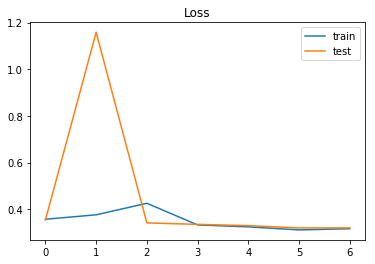

In [99]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();



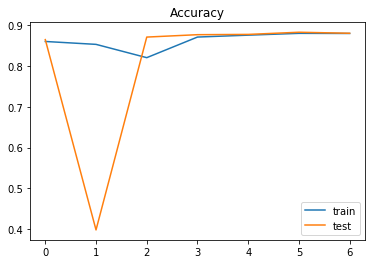

In [100]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();



In [101]:
from tensorflow.keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [20]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [21]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 10
history = loaded_model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/10
1333/1333 [==============================] - 54s 38ms/step - loss: 0.0638 - accuracy: 0.9761 - val_loss: 0.1750 - val_accuracy: 0.9476
Epoch 2/10
1333/1333 [==============================] - 84s 63ms/step - loss: 0.2756 - accuracy: 0.9258 - val_loss: 0.1714 - val_accuracy: 0.9480
Epoch 3/10
1333/1333 [==============================] - 85s 63ms/step - loss: 0.0690 - accuracy: 0.9745 - val_loss: 0.1626 - val_accuracy: 0.9484
Epoch 4/10
1333/1333 [==============================] - 83s 62ms/step - loss: 0.0835 - accuracy: 0.9713 - val_loss: 0.1853 - val_accuracy: 0.9408
Epoch 5/10
1333/1333 [==============================] - 86s 65ms/step - loss: 0.0798 - accuracy: 0.9704 - val_loss: 0.1757 - val_accuracy: 0.9449
Epoch 6/10
1333/1333 [==============================] - 84s 63ms/step - loss: 0.0705 - accuracy: 0.9742 - val_loss: 0.1753 - val_accuracy: 0.9449


In [23]:
epochs = 7
history = loaded_model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/7
1333/1333 [==============================] - 84s 63ms/step - loss: 0.0701 - accuracy: 0.9743 - val_loss: 0.1718 - val_accuracy: 0.9484
Epoch 2/7
1333/1333 [==============================] - 86s 64ms/step - loss: 0.0887 - accuracy: 0.9679 - val_loss: 0.1725 - val_accuracy: 0.9445
Epoch 3/7
1333/1333 [==============================] - 86s 65ms/step - loss: 0.0660 - accuracy: 0.9751 - val_loss: 0.1670 - val_accuracy: 0.9484
Epoch 4/7
1333/1333 [==============================] - 89s 66ms/step - loss: 0.0729 - accuracy: 0.9737 - val_loss: 0.1778 - val_accuracy: 0.9451
Epoch 5/7
1333/1333 [==============================] - 88s 66ms/step - loss: 0.0628 - accuracy: 0.9768 - val_loss: 0.1854 - val_accuracy: 0.9458
Epoch 6/7
1333/1333 [==============================] - 85s 64ms/step - loss: 0.0620 - accuracy: 0.9764 - val_loss: 0.1700 - val_accuracy: 0.9471


In [29]:
epochs = 7
history = loaded_model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
1333/1333 [==============================] - 94s 70ms/step - loss: 0.1483 - accuracy: 0.9445 - val_loss: 0.2136 - val_accuracy: 0.9233
Epoch 2/7
1333/1333 [==============================] - 95s 71ms/step - loss: 0.1376 - accuracy: 0.9482 - val_loss: 0.2007 - val_accuracy: 0.9282
Epoch 3/7
1333/1333 [==============================] - 92s 69ms/step - loss: 0.1404 - accuracy: 0.9468 - val_loss: 0.2062 - val_accuracy: 0.9272
Epoch 4/7
1333/1333 [==============================] - 95s 71ms/step - loss: 0.1315 - accuracy: 0.9501 - val_loss: 0.2044 - val_accuracy: 0.9276
Epoch 5/7
1333/1333 [==============================] - 91s 68ms/step - loss: 0.1345 - accuracy: 0.9484 - val_loss: 0.2052 - val_accuracy: 0.9264


In [34]:
epochs = 7
history = loaded_model.fit(X_train, y_train, epochs=epochs,verbose = 1,batch_size=60,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
1333/1333 [==============================] - 95s 71ms/step - loss: 0.0986 - accuracy: 0.9626 - val_loss: 0.1715 - val_accuracy: 0.9413
Epoch 2/7
1333/1333 [==============================] - 93s 70ms/step - loss: 0.0950 - accuracy: 0.9635 - val_loss: 0.1676 - val_accuracy: 0.9427
Epoch 3/7
1333/1333 [==============================] - 94s 71ms/step - loss: 0.0981 - accuracy: 0.9628 - val_loss: 0.1707 - val_accuracy: 0.9430
Epoch 4/7
1333/1333 [==============================] - 92s 69ms/step - loss: 0.0952 - accuracy: 0.9633 - val_loss: 0.1689 - val_accuracy: 0.9448
Epoch 5/7
1333/1333 [==============================] - 88s 66ms/step - loss: 0.0900 - accuracy: 0.9658 - val_loss: 0.1706 - val_accuracy: 0.9435


In [1]:
accr = loaded_model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

NameError: name 'loaded_model' is not defined

In [36]:
from tensorflow.keras.models import model_from_json
# serialize model to JSON
model_json = loaded_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


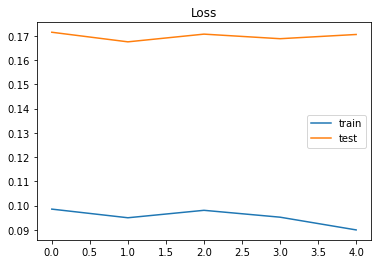

In [37]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

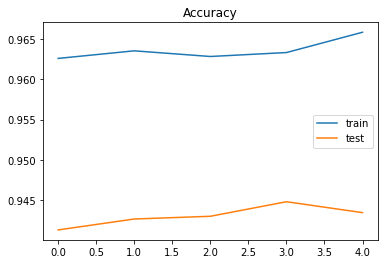

In [38]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [39]:
dna="ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGGAATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAACTCAGAGAAATTTCTCAAAGATTAATGGTAGATGAAGATAACAGTGCGAGAGTTCTTTTAGAGAGGAAGTACTGTATGAAGAAGGTTGGACTGTTAGGAAAATTTTCACCGCGCTGGTTCATTTTCAAGGGTACGAATTTGGCTGTTTTCCATTCAGCTCATGAGGAAACCCAACCAAAATTCTACAGCTTAGTTGGTGCAGCATATGAAGTTGAAGATAGAGATTCTTCTCCAAACAAAACATTATGGGCAACCCCAATAGAAATTATTTCTGAAGATGGAAATATTGTGCATAGTGATGCAAAGTACAGGCTCTCTGTAGTTACAAAAGAGCCAAAAGTAAGACACTTTTGCTTGTACAGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAATTTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGATGTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACAATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAGTGGCAAACTATCTATAAGGTACAAAACAAAGATTCCAATGAGGGGTTAAAGTTGTTAGGTAGGGAGGTTATGCTAGGTAGACTTTATCGCCGCGACAAATTGTTAGTTAGAACTAGCCAACAAAGAGAAGCAATTATTGAGCTTATCCAAGAAGGATATAGAAGAGAAAAGAGCAAAAGCCAGGCTCAAATGAAAGCTTCTACTGAGAGCATTGAAACTACTGATAGCGACGCAGCTGCCATTGCTGCTACTTCTGAAGGAGCACAAATTAAGCAGGGTCAACAAGGGCGTGATTTTCCAACTGTTTTTTACGTCAACCCATCAATAGAGAAGTACCATTCCAAAATTTTGGATAGTAAGGAACAATCAATTAAATCAAAATACTCTAAGCATACAATTATTCCTACATACCAGGAGGATGCAAATGTTAGGATTTCGAGTGATTTAAGCAGGGTTATTTGGGCCCCAAAAAAGTGGGAATCTGTTGGAAATAAGAATATGTTTATCGATGTAGATTCAATATCATCGATTATTGTTAATGCATCAAAGCCCTCATATGCATCAAAGGGACTATACTCTGCTCCTAGTATAGTTAGCGAATATGATATCGCTGAATGCGTTGATGAGTATGTATACAGTATGACTGATTCTTGCTTCTCTCATATTGCAGATAAGGAGAAAAGAGAGAGAGACCCACAAAATAGAATCACTACTGGTAACTGGTTGGCTATTTGCGGTCCAAGATTAGGATTTAAACCAGCATATTCACCAGATTTCCTGATCCGTGATACGCCTGTAGTTGTTATGAAAGTTAATATCAACATTAAATCTATCAGTTTAAATGAGAGGTTCTCTCGTCTTTATACAGAATATTATCAATATTATGCTGATGAATTGCAAGAAATGACTCCTTATGAGAAGACAACCACAATGGCAGCCTTAACTTATGGTGATAACTCTCAAACCACCAAATTGAACACCATCAAATCTTTGGTTTCAAACGTCCAAACAAATGAAGAAATAGTACGTGATTACGGCACAATGACAAGTAGCATCTCTAGCATTAGGAGACTATTTACAGCAGCATCAAACATTGATAACGAAACAATTGAAAATAATCTTAAGGAATCAGGATCTTCAAACTTTGAAAATCAAATTAAACCATCAAACTCTACAGTTGCATCGATAAGAAACCTTTTCACAAAAAATATTTCAAATGTCAAAGATTTTAATTCTCCAAGATCATCACCAGTAAGATCTCAGACGAAATCTGCAACTGTTACAGGCACAAAACCCGCAAGGCAAATTGATGGATTAGTGCTCCCTCCAGAACTAAGTGTTATTGATCCATTTAAAACAGTCCAGGTTGAAAGAAACCTAGAGATAAGGGATAGCACAGTTCAAACATATCTAAGAATTACAGCCTTTCATCAATCTTATACATCTGCTCATGCTGTAGGCGTTAATCCAACATATGACTTGAATTTTTGCGTTGATGTCCCATTGATGACATCAAATGCTTCAAAAGAGATGATTAATGAGGCAAGAATCAAAGCTATGGAAGATGCTATTTGTACAGTCGACCTTTGGGTTAAGTCGCCAATTGATTGTGTTCCGGATGAACTTATTGCATCTATTGATATTCCTCTAAAGGAATTGAGCAACAGTGATAGACTTTCCAGACAAAGATCTCAGTTTATTGCTGCTGATTCATTCATTCTTAAGCAACCAGTTCCTGATTTAAAATCTAGTGTTAGTGGCAATTCAAGAGCAATTCAAATACTTAAATATTTGGGTCTTCTAGATCCAAGTAGCGAAAATTTGGAAGATTTACCACTTGGTCAATTGGATATTTCTGCTGATTCAGTCATTGAGACATCAATTATGGGAGAAAACCCTATTTCACCTGAAACTATTTGTTTAGGTGGTCTTCAGGGTCTTTCTTCTTATTCAATTGATCAGTCTACAAATCAAAATATCAGACAAAAGAATGGAGATTGTGTTGAATTATATATTGGGCAAGTAAAACTTGATCCAAATTGGACTCCAGGTCTGTACTTTGTTGAAGTTATTATGGGAGATGTTAGTTGTATGACTCACTTAGTTCAAACAAGATACGATTCAATTTCTGCTGATTTCCGTTCTCATCTGTATATTCCAAGATATGATAATCAACTTGGAGTTGATCCAAAGTGCTTACAAATATTGATAAGACGTGCATTGGGAACTGAAGATAGATGTTCCTCATTGGCTAGGTTACTCCAAGATTCTGTTATAATGGGTGAGTTAATTGTAGACGTCACAAAGTTAACGATGAATGAACCACACAGTAGCAATGGACTTTATGCTGTCTTCAAACCAACTACATCTGCACTCTATGGAAGTAGAGGTTTGGATTATGCTTTAGAAATAGCCCAGTTGGGGCCAAAATCTGATGAGTTGCAAGAAGCAAAACAACACATCATGTTAGATGTTCAAATTAGAATGATGATCACATTGAGAAGAAAAACAGACGTAACATTAAAAAAAGTAATTGATCAATCAGATGACTTTAAATTAGTGGGTGATACTGCGCTACTAGTTGTAGAAGAAGAGCTGAAATATCCAATTTCGCAAAAAGAATTCCATGTAAAATGCTGCCCTGGTAATTTTGATACATTAAAAGCTGGAACTCTTGGATTGCCATTAAGATCAGTTGGAAACTATATAGAATACGAAATTGGAGGGTTCCAAGAAAATTCAGATCAACAAATCAACGATTTGAATACTCTAAACAAATTCGAGAACGATAGCATTTTAAACGAAGAATTAGAAGCTATTGATGCTCAGCCAGTTCCGTTATATGCGAGCGATCCAGTACCTGCTCAATTCTATCTCCCGGAAGATCCACGCACATTTAGAAGCCGTAAGTTACCAGGTATTTGGCATCGAATATTGGCTGATGGATTTAGACCAGGGGAACGCGTAACGAGACTTACACATCGTGTTAGATATGTTCCAGTTACTATTATTGCAATATATAAAAACAGGACTGCTTTGTGCAGATGGGCAGAAAATGTTTCTATAAATCCAACAGAATTTCCTGAAGGCTGTGTATTCATCCCAGAACAAAGATTAGTCATGGGCGTTCCGCTTTCATTTCTTTCAACCCCACATAAAGCTGGTATTCATGTATATGATTCGACTATCACTAGACTACCGGATAACAGTATAACATTGTTAAGTGATATAACGAACTATGGTGGATACATGCCATTGAGCGTTAACCCAATATTCTGTGAATATGAATGGGTACTCTGGATTAAGGCAGAGACCCCTCAACAAATGACTTTATGGGCAACAATTATTAGGAATACTGTAAGAGAAAGAGCATTTAGACGTGTTAGGGCATATGAAAGAACCAGAGATATAATGAATAATGAAGAAGAGGTTGAAAATAATGATTGTAAAGCTTCTACTTCCATGATCTCAAGAAATTCGAATGGTCAATCATACTTAGAAAAACGATATGACAGTGGAGAATTAGAAGTTGTAGTACATAGCTCAAAGATTTTGTGTAAAAGTAATCAATCATTAAACTTTTATTCAGTTTTCCAATGGGCAAGAATACCAAAACAATTATACGAAATGATTGAAAATGAAGGAAATTATGATGTTAAGAGTAGTATTCGCCAAGCAATAAAAAGAATTATTGAGGAAAGTATTCTTGGATTTAATATGAAAAATAGAAGTTCAGTTACCGACCAATTGACTCCTCAAGAATTGAGGCCTGCACCAATAGATATGAGTACTGCAAAACTGCATGCAAGCTATATTCCATTTAGTCTTTCAACTCAAATAAAAGAGAATAATTTGTACTCTGTTGATAGGATAAAAGATGAATTCTTAATTTTGGTTACAAAAATAACATTCAGTTCTTATTACCTTTCAAATCTATGCAAAAATGTTTTACCAGATGAAACTTCTCCATATGTAAAGAATTCGAAGGAAGCCAAATTATTGGATAAGATTAGCGGCGAATTGGTTGGCGTAGTTCCTGACAAACTAGACAAAAATAAGTTGACAAATGAAGTTTATAATACATATAGATGTAGGTTTTATAATAACAAAGATACGTGCGAACAGGGAGGAAGTGTATTCAGTACAACTCATATTGATACAAGTGATGAAGTTCCACTTTTAATTATTAAACTATTCCAAGAGTCAAATGATGGTTTGGATACATTTATTGGCCATGTAATATTGAATACTGTTGATTACCTGACTCCAGAAAATCCATTCCAAATTAAATACAAAAAAATCAATCCAAGATATACTTATATTGTTTCTGCTTCAGGTACCGGTGGTAAGATGTATAGTTTTGATACAGTTCCTGATGCATTAAACTTTGTAATGTCCCAAAATAAAGAAATAACTGTTGAAGAATTTTATAGGGCATTATATGGAGAAACAAATCAAGCAAGAAGAATTCATGGTCCATGGAGAGTCAGAGTGCAAGAAAATATTGAATACCATGGTGACGTTTGTTTAATGGTTAGATATGGCCCCACTGATATTCGGCTATTGACAGAATTCCAACCCACTGCTAATGATTATAAGGAACATATCTTAGATTATCATAGAAAGCAATTTGATGACAGTGGTATTCCATATATTCATACAGTTTATGATCCCAATACACCATTTGCAGTTAAGATAGCAAGAATATTCGGGAACAAGTTTGGTCAATTGAATGGAAATGTTTTTGATTTGTTAAAGAAATATTCAGATGACACGAAAATGCTTAAATTGATACAAATGTATTTATTAAGACCAGCTGAACAATGGGTTTACGAGAGAAGTCTTTATGAACAAATGTTATTCTTAGAACCATTGACAGATTTAATCGAAAAGCAGAATATGACAAGATGGAAATATTTATTAGCAGATTCTAATAATAGAGGTTTACAACAATGGGAACAACTATACCGTCAAGGTTTATTATTGCATAAAGTTGATGAATTATCATATGATAGTTGGTCTATATTAGTAAATGCTAATGTTCGTGACCGTTTGCCATCGATTTTACTTGAATTATGGAATGGAGAAGAATATTTAGGTGAATATTTATTGCCTTCGTTGTCATCCTTACTATTAAGTAAGATTAACACTACAGTTAGGCTACATACATCTGCTTTGGCTAGAGAAAATGATAAGAAAACACGTTATGACATCCGAAAGGAAAATTTAACAAGTTCAAAATTGTCTACATTTATAAATATGGAAATTAGTTGGAGAATCAAAAGCACGACTGAAGGTATATTTGGATTGATAGTAAAAGATGTCAGAAATGTTGTTTCTGAATTAACAGATGACTTAAATGAAATTAAACCTCAAATACATGTTTATCAGTACTTTTCAGATAACGATCAATGGAGAATAATGGAAATAACTAAGCCTAGTATTGCTACAAGAACAATTTTGGGCATCGAAACTCCAGAAAAATTAAAAAAACAAAATATTGAATGGAATAATGTTTTTGTTTATAGCCGAGACAGAATTGTCGATCTTCAGTTCCCAATATCAATTCCTGCTATGGTTGAATCAGTCCCAATTGTATTTAACTTTAATGAATTGTTGCTCTCAGATAATAATAGTATCAAATTAGACAAAGATGAAAATAATGAGGTTGTTGAAAAAATATGGTCATTATTGAAATCAGGAGTTCCAAACTATTATCGTCCGTATATTTGGATGCAGCTAAGCGGCGCAAATGACTTAAAGAACTCAATCCAGAAAAAATGGCAATCGTTGAATGATTCAAATAAATGTGGTCATGACACGTTATTCTCATATTTAATTGAGTATGCAGATACATGTAATTCTTGCGTATTGAGGCAGTTAGATGAAGATATTGAATCAGCGAAAATACGTTATCACATGTGCGAATCAATATTGGGCATTGATCAAGTTCATACTTTCTGGGAAAATGTCCGTTATATTATGAGAGCATTAATTGTTTTCTCATTAAGAAAGAAGTATAATATTTATAACTGCGAAAAATTCCATGTTGGATTGCCATTACAATATGCATTTGGCCTATTATCCTTAACTATCGAATTATTAATGAATTTTGGTGGTGTCTGTTTAACTCCAGAAGATGTTTTCTATCTAGTTTATTCTGTGTGTGGTTCTAGGCATAATATTTATTTAAAATCTAATAATGAAGAAGATAAAAAAGATGAAAATAGATCTTTGAAGAATAAGAAATTGATAAAAGGTGCTCTATTGCCTTATTATACAACAGAAGAACAAGAAGATGATTTAAACAATGATATGCCTGCGCAGATTAATGATATCATTTTCTTAAAGAGTGCTTTAGAATTACTACATCCATTTGAATACGATAATATGTTAGCATCCGGGTTTCAGCTTGAAGAAATATTTTATGGATGTCTAACATCAATATTTGCAGGCTCATTACCATCTTCAACAATTACACAATTGTATGATTTATTGTTCAATGTATACTTCCAACCAAAAGATATTTTCATGAAAAGAGGAGAGCACCATCATAAACATGATCATAAAAATGATATTGATTATAATGATAATAAAATAAATATTTCACTTAGTAGGCGTATTTTAATATGCTTATCTTACTTTATCATAACAGAATCATATCGTGAAATTAATATCAACCCATTGATTTCTTCTAAGTGTATTCGTGAAACTATTAAATCTACTATGGCTACTATGAGAGATCCATTAGAAATGGTACACGGTATTGAAAGAGCTGATTTTATCATTTTTGGAAACAAGAAAATTTATGAAACTATATTAAAATTATATGAGACATATATTATTTCATATCAAGAATCTTTATGGTTTTCGAAAAAGCAAAATTCGGTGTTAGAAAAAATGATCAATATGACCCCATTACAAAATCAACATGGTAGTGATGCACCTTCACATTTAGGAATGAGATTCATTGGAGGAAGATATGTACCCAAGACTGTTGCTTCTCCTGGATTATCACTAAAAGATTTAACAGAGTCATTATATCCATTAATTAAATTCCAAGCACTCTATGCGGGGAGAAATCTGCATCAATTACCACCTGGAATTGCTGGTTATGTAATAATAAAAATAGATGAAGTACGTGAATTTGCCAAATATAATGAACCCATATCTCCGGTAGTTTGTGTGAGAATGGACCAATATAAAGTTGCAACAGACCCTGCAACTGAAAGATGTTCTAGATCATTTATATGGAAATCAAATAACGTATTTATGTTCCCAATACCGATTTGGAAATCTCCTACACAAAAGAAAAATTTAAATGGACGCAACAGCTATCATTTACATAAAGAGTCATCTGAGTCTGAAATGCCGTTGACCGTTGAAATTTTTATCGAAGTTTTGGATTCCGAAGCGCTTGATGATGAAAATAAATTATTGTGTTCAGCACAATTAAGTTTAGACAGGTGGTCAACTGACGGTGGTAGCTTATCATTAAATGGTGATGATGGAACATTAGCAATATATAATGATTGTAATAAAATGAGCTTACTATTTTCATGGTATACATATGTACCAAATAGTGAGTTGGACACAAGCGCTTTATTACCATTTTCATTTGGAAAACAACAATGGGGTGATTATGGTGGCTACCACTGTATCTATGCACCAGTTAATGTAGAGTCATATAGGAATGAATTGCATTCCGAATTAAAAGAGGAAAAATTGAAAGAATGGGAATCAGAGCCAAGACAAAGCGTATTAGATATTATTCGTGGTCATAGAAAAATGGATGAGAGTGGTGGAAATTTAGATGCTTTACCAACAATGAGATCCATGTATCCCGGTAAATTGGAAATCAGCACTGGAAAGTACGGCCCAACTAGATCGCAATTGCAACAATTGTTTTTCTTCTCAGCTCCTTCTCTTTTACCATACGTTGACGAGATTGTCGAGAGTTTTGCAAAAATATCTATGAACTCATCAGAGGAGAAGGTTACATTAACCCCAGTACCTTTAAGAGAACTCATTGCATCCATTATTTTATGTTCCCGTGGTACATTAAGCGAAAAAGCCAATTTATTATTTGATTTATTTGGCTATGATGATGCAAATCGATTGTCTGTAGCATTCCATTCAATGTATTATTCTCATACTCCTCAGTATCCAGCGGCTATTCAAATTGGTTCCCAATTAAATACTCATTTACCAGTTGAGGTATCTGATAAACTAGGTGTTGCTCCTTCAAATGTAATTTCACTAGCAGGCGTGGCAGCAATAGTACAAACTGCATGCATACGTTCAAATATACCATTAGATAATGTTGGAATTTACCAAATTACAGCTTCAGTATTTGACCATTATTTCGATGTACCTAGTGTTGTAAAAGCATTGATTATACCTCCTAAGGGATATGATGGGCGTGTATCTAAGGAATATATTACACATAATTATCGCAATTTGAAGTATGATACGAGCTCAATATCAAATACTGAAGATATTACAATAGATAATATGAATATTTTTAGTGATTGCAAAGGAAGTAAGGGTATCTTTAACTCAATTAATTGTATGAATGGTAAAAGTGTTAAAGAAAATGCATACTGGTATAACATCGATCATATGATTGACAGTAAATTTATTTTGGATGTATCGAGATCCATAACACACCATATTAGAAAAAATGCATCTTTGGAAGGGTTATTTGGAATTGATTTCTCTGTTCATACTTGCCTAAGGCATTTTGATATTAATGATCCTTTCCCAGGTTTAATTAAAACATTAAGAATAATTATTAGTGGGAAGAGAAGTAAACATGAAATTAGAATAATTGATCTAACAATTGATGAGAAAGGCCACTTTATTGATTCAAGAGTACAATATGGTACAGAAACTAGTGATGATTTGCACACGACAGATGTTAGAGGAGCAAATCAATTCAGACAAGCATTTGAATCAGGTTTAGCAACTGTCGATTTCCCAAGACTGTTGTTTAGTGACGGAGCTGCAAATGGTAAAGAAAGAGTGCCTACTGCTAGTTTTGTCTTCAATCTACACAATATCTTAATTGATAAATATAGTTTTGTTACAAAATTCTGTGATTTCACATTAGTAACAGAAGCAATAAGGAGAATAACTGCTAATGATCGTACATGCGAGCCTAATCGATATCTTAAATTAAATGTAGAAGTTAATTTAACCCTCGAAGAAAACAGATCTTATCCTCACTACAGCGTTGATGAAATCCTAGGCGTTCCATTAAAAATAATGAATAATAATGACGAGCTAGCAAATCAATTAAGCCAATCTCTAGTAATCTCTGGCTCAAATAATAATATTGGTAATCAAAGTCAGAGAAGTGTTATTTCAATGAATGCCTCAACATTAATGAATGAAGATGGATACATGACTCAAAGATCAATGATTTCAACTAATTCAAAACAAGTATTCGAGCCGTCTTTATCGGTGCATTCTTCAATGCCTTTATTAACAGAGGGTGAAGACACAAATGAAGATGTTGGTTGTCAAAGTATAGAAGCAGAGAAGTTGAAATCAGGTATTTCATTAACGAGCAGCAATAGCATTGCTAAAGGTGAGATTGAAAAGATGTTATCAAAGAAATCTACTTTAGTTGGAGATGAAGAATTGGAAAAAATGGTTTCAAACAATTCATATCAAGACAATAACGTTAATAATGCCGAAAAGTTGCCGACAAGAACGGAGAGTAACTCAGGGGCTGTATTAAAGCAAGCTTCTACTGCAACTTCTAGGATTGCTGCTTTGTTTATGACTAGGCAATCTTCATTGTTTAATTCTCTATCATTCAATAATGATGGCGAAAATAATAAAGAAGCCGACGGTACTTTAGATTCTAAATTGAATTCTATTGCTAAATCATCTTCAAAAATTTCTGATGAAGAGATAAATAAAATAGAATCAACTTCTATTCCAAGAAATAAATCTTACAATATTGATGAAGATGAGGAAGAGCTTAAAGTGGATGAAGAAGAGGAAATGTTATTGCAACAACAACAATTATCTTCAGCAATTAATTCATTTAACTCTAAAAGAATAAATTCTCAAACAAGTCTACTTAGCGCAGTAAGTCGCGGCGCATCAACTGTAAATCTATGCCGTACATTCACTAGAGGAAATTTTGGCTCATATTATGAGGCTGAAGGCAAGACAGAGTATCAGGTTGATATTCCTTTTAGACCACCAGGCCAGGTAGAAGAGAGGCATAATATTAGAGTTTATTTGGCTGACAGCATCCGTGTTTTAAAGAATAAGGTAATGGAAGCTTGCAAATCAATTGCTCAAAGGTTACAAGAAAGTGGAATTGATAATGGATTGTATAAAGAGATTGTATTAGGGCCACATCATGTAGTTGAGCTAGTTGTTACTGACTTTGATGGCCATATTCGTTATTTGCCTTTATTAAATGAAACAAACTCTATTGAAGACTATATTCTTTCAAATGAAGATTTACTGCAAGAATTTATAACTTCGAATATGAATAGCATTCTTAACATCAGAATCATTCCACCAAAGAATTTACAAACAGAGAAATCAACTAGAATCGTTAATGAGATGCAACACGAAAGTGGTGGAGCTTGTATTACAAGTATGTATTTGGCAAATGAGCTTGCAAACCACGAAATATTGGAAGATGGATTATTAGTTAGGAACCCATTAGGGTTTAGAACATATTTCCATAAGGCTCATTATGAAATAAGAAACAAGATGATTGAAATTGAACCGGGAAAAGTGGTATCTTTGGATAATTTATGTTTTGTAAGAAAAAGTAATACAGTACTAAATAACCTAGCAGCATGCATAAATTTAGATTGGAATGTTGATGAATGGGTTCCAGCAGTTGCAATTAGAGGAATTAATACATTCTTGGATGAACTTGAAGGCATTCATTCTGAGTCGGTGCGTGGCCGCACATCTAGAATTCCGCAAGCAGTATTAAGTGCATCGTCAACGATCGGAGGGTTTATGCCAGTAACATTAGGAGCATATAACCCAATTTCTGCTGCGTTTGACTATGGTTATGGAGCAAGAAATGGAAGCATATCTGTTTCAAATAATCATAGAAACTTTGGAAATGGATCTAGTACAAAGAGGTACAAAACTGGAACGAATTCGGGCACTAAGAAATTTGGAACGACTACAACTGGTATAGCCAGTACAAACCAACCTTCTAACTCTGTATCTTCAAAGATTAAACCAGAAGATATGATCACATCTGTTTATGGATGGGATCTATGCTATGAAGTTATTCTATTAGATTTCCATGACTTGATGATTGAAGGAGGAATCAATACAAGAGAGTCCATTTGTGTAACTGAAAATGATGTTATTTTCTGTTTCAAAAATCCAAGTGTAAGGCAGCAATTCGAGATTACTCAACTTACTACGGACGAAAAAATTAGAATTATGTCTCTTTCTGAATCAGGGATGTGCCCTCAAAGAATTGCGCTCGAGCTATCTGAAGACAGAGTTGCTGCATTAAAGAGTGGCTCGTACTCTATGCTATATAATAATCAACCAAGAGCAGTTGTTGTACCACACCAATTAGTTTCTGAATTTTTGAGAAGGTTCAGAGCAGCAATTGAAGAAGACAAACATATTTTC"
rem=len(dna)%60
print(rem)
X_seq=[]
for i in range(0,60-rem):
    dna=dna+"A"
flag=True
k=0
while(flag==True):
    #print(k)
    seq=dna[k:k+60]
    X_seq.append(seq)
    k=k+10
    if k==(len(dna)-60):
        flag=False
print(X_seq)    

X=[]
for i in X_seq:
    j=list(i)
    for k in range(0,len(j)):
        
        if(j[k]=="A"):
            j[k]='1'
        elif(j[k]=="T"):
            j[k]='2'
        elif(j[k]=="G"):
            j[k]='3'
        elif(j[k]=="C"):
            j[k]='4'
        else:
            j[k]='1'
    
    m=[]
    for ft in j:
        m.append(float(ft))
    print(m)
    X.append(m)
print(len(X))
#gene_predictions = loaded_model.predict_classes(seq)

0
['ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAA', 'ATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAA', 'AGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAA', 'AATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAA', 'CCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTAC', 'AGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAA', 'TTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTC', 'TAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACA', 'TTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTT', 'AACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAA', 'AAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGC', 'GGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGAT', 'CTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAA', 'GAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTA', 'GAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACT', 'GAAATGCAGCAGAGACAGATTGAAGGTAAATCATAT

In [40]:
dna="ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGGAATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAACTCAGAGAAATTTCTCAAAGATTAATGGTAGATGAAGATAACAGTGCGAGAGTTCTTTTAGAGAGGAAGTACTGTATGAAGAAGGTTGGACTGTTAGGAAAATTTTCACCGCGCTGGTTCATTTTCAAGGGTACGAATTTGGCTGTTTTCCATTCAGCTCATGAGGAAACCCAACCAAAATTCTACAGCTTAGTTGGTGCAGCATATGAAGTTGAAGATAGAGATTCTTCTCCAAACAAAACATTATGGGCAACCCCAATAGAAATTATTTCTGAAGATGGAAATATTGTGCATAGTGATGCAAAGTACAGGCTCTCTGTAGTTACAAAAGAGCCAAAAGTAAGACACTTTTGCTTGTACAGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAATTTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGATGTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACAATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAGTGGCAAACTATCTATAAGGTACAAAACAAAGATTCCAATGAGGGGTTAAAGTTGTTAGGTAGGGAGGTTATGCTAGGTAGACTTTATCGCCGCGACAAATTGTTAGTTAGAACTAGCCAACAAAGAGAAGCAATTATTGAGCTTATCCAAGAAGGATATAGAAGAGAAAAGAGCAAAAGCCAGGCTCAAATGAAAGCTTCTACTGAGAGCATTGAAACTACTGATAGCGACGCAGCTGCCATTGCTGCTACTTCTGAAGGAGCACAAATTAAGCAGGGTCAACAAGGGCGTGATTTTCCAACTGTTTTTTACGTCAACCCATCAATAGAGAAGTACCATTCCAAAATTTTGGATAGTAAGGAACAATCAATTAAATCAAAATACTCTAAGCATACAATTATTCCTACATACCAGGAGGATGCAAATGTTAGGATTTCGAGTGATTTAAGCAGGGTTATTTGGGCCCCAAAAAAGTGGGAATCTGTTGGAAATAAGAATATGTTTATCGATGTAGATTCAATATCATCGATTATTGTTAATGCATCAAAGCCCTCATATGCATCAAAGGGACTATACTCTGCTCCTAGTATAGTTAGCGAATATGATATCGCTGAATGCGTTGATGAGTATGTATACAGTATGACTGATTCTTGCTTCTCTCATATTGCAGATAAGGAGAAAAGAGAGAGAGACCCACAAAATAGAATCACTACTGGTAACTGGTTGGCTATTTGCGGTCCAAGATTAGGATTTAAACCAGCATATTCACCAGATTTCCTGATCCGTGATACGCCTGTAGTTGTTATGAAAGTTAATATCAACATTAAATCTATCAGTTTAAATGAGAGGTTCTCTCGTCTTTATACAGAATATTATCAATATTATGCTGATGAATTGCAAGAAATGACTCCTTATGAGAAGACAACCACAATGGCAGCCTTAACTTATGGTGATAACTCTCAAACCACCAAATTGAACACCATCAAATCTTTGGTTTCAAACGTCCAAACAAATGAAGAAATAGTACGTGATTACGGCACAATGACAAGTAGCATCTCTAGCATTAGGAGACTATTTACAGCAGCATCAAACATTGATAACGAAACAATTGAAAATAATCTTAAGGAATCAGGATCTTCAAACTTTGAAAATCAAATTAAACCATCAAACTCTACAGTTGCATCGATAAGAAACCTTTTCACAAAAAATATTTCAAATGTCAAAGATTTTAATTCTCCAAGATCATCACCAGTAAGATCTCAGACGAAATCTGCAACTGTTACAGGCACAAAACCCGCAAGGCAAATTGATGGATTAGTGCTCCCTCCAGAACTAAGTGTTATTGATCCATTTAAAACAGTCCAGGTTGAAAGAAACCTAGAGATAAGGGATAGCACAGTTCAAACATATCTAAGAATTACAGCCTTTCATCAATCTTATACATCTGCTCATGCTGTAGGCGTTAATCCAACATATGACTTGAATTTTTGCGTTGATGTCCCATTGATGACATCAAATGCTTCAAAAGAGATGATTAATGAGGCAAGAATCAAAGCTATGGAAGATGCTATTTGTACAGTCGACCTTTGGGTTAAGTCGCCAATTGATTGTGTTCCGGATGAACTTATTGCATCTATTGATATTCCTCTAAAGGAATTGAGCAACAGTGATAGACTTTCCAGACAAAGATCTCAGTTTATTGCTGCTGATTCATTCATTCTTAAGCAACCAGTTCCTGATTTAAAATCTAGTGTTAGTGGCAATTCAAGAGCAATTCAAATACTTAAATATTTGGGTCTTCTAGATCCAAGTAGCGAAAATTTGGAAGATTTACCACTTGGTCAATTGGATATTTCTGCTGATTCAGTCATTGAGACATCAATTATGGGAGAAAACCCTATTTCACCTGAAACTATTTGTTTAGGTGGTCTTCAGGGTCTTTCTTCTTATTCAATTGATCAGTCTACAAATCAAAATATCAGACAAAAGAATGGAGATTGTGTTGAATTATATATTGGGCAAGTAAAACTTGATCCAAATTGGACTCCAGGTCTGTACTTTGTTGAAGTTATTATGGGAGATGTTAGTTGTATGACTCACTTAGTTCAAACAAGATACGATTCAATTTCTGCTGATTTCCGTTCTCATCTGTATATTCCAAGATATGATAATCAACTTGGAGTTGATCCAAAGTGCTTACAAATATTGATAAGACGTGCATTGGGAACTGAAGATAGATGTTCCTCATTGGCTAGGTTACTCCAAGATTCTGTTATAATGGGTGAGTTAATTGTAGACGTCACAAAGTTAACGATGAATGAACCACACAGTAGCAATGGACTTTATGCTGTCTTCAAACCAACTACATCTGCACTCTATGGAAGTAGAGGTTTGGATTATGCTTTAGAAATAGCCCAGTTGGGGCCAAAATCTGATGAGTTGCAAGAAGCAAAACAACACATCATGTTAGATGTTCAAATTAGAATGATGATCACATTGAGAAGAAAAACAGACGTAACATTAAAAAAAGTAATTGATCAATCAGATGACTTTAAATTAGTGGGTGATACTGCGCTACTAGTTGTAGAAGAAGAGCTGAAATATCCAATTTCGCAAAAAGAATTCCATGTAAAATGCTGCCCTGGTAATTTTGATACATTAAAAGCTGGAACTCTTGGATTGCCATTAAGATCAGTTGGAAACTATATAGAATACGAAATTGGAGGGTTCCAAGAAAATTCAGATCAACAAATCAACGATTTGAATACTCTAAACAAATTCGAGAACGATAGCATTTTAAACGAAGAATTAGAAGCTATTGATGCTCAGCCAGTTCCGTTATATGCGAGCGATCCAGTACCTGCTCAATTCTATCTCCCGGAAGATCCACGCACATTTAGAAGCCGTAAGTTACCAGGTATTTGGCATCGAATATTGGCTGATGGATTTAGACCAGGGGAACGCGTAACGAGACTTACACATCGTGTTAGATATGTTCCAGTTACTATTATTGCAATATATAAAAACAGGACTGCTTTGTGCAGATGGGCAGAAAATGTTTCTATAAATCCAACAGAATTTCCTGAAGGCTGTGTATTCATCCCAGAACAAAGATTAGTCATGGGCGTTCCGCTTTCATTTCTTTCAACCCCACATAAAGCTGGTATTCATGTATATGATTCGACTATCACTAGACTACCGGATAACAGTATAACATTGTTAAGTGATATAACGAACTATGGTGGATACATGCCATTGAGCGTTAACCCAATATTCTGTGAATATGAATGGGTACTCTGGATTAAGGCAGAGACCCCTCAACAAATGACTTTATGGGCAACAATTATTAGGAATACTGTAAGAGAAAGAGCATTTAGACGTGTTAGGGCATATGAAAGAACCAGAGATATAATGAATAATGAAGAAGAGGTTGAAAATAATGATTGTAAAGCTTCTACTTCCATGATCTCAAGAAATTCGAATGGTCAATCATACTTAGAAAAACGATATGACAGTGGAGAATTAGAAGTTGTAGTACATAGCTCAAAGATTTTGTGTAAAAGTAATCAATCATTAAACTTTTATTCAGTTTTCCAATGGGCAAGAATACCAAAACAATTATACGAAATGATTGAAAATGAAGGAAATTATGATGTTAAGAGTAGTATTCGCCAAGCAATAAAAAGAATTATTGAGGAAAGTATTCTTGGATTTAATATGAAAAATAGAAGTTCAGTTACCGACCAATTGACTCCTCAAGAATTGAGGCCTGCACCAATAGATATGAGTACTGCAAAACTGCATGCAAGCTATATTCCATTTAGTCTTTCAACTCAAATAAAAGAGAATAATTTGTACTCTGTTGATAGGATAAAAGATGAATTCTTAATTTTGGTTACAAAAATAACATTCAGTTCTTATTACCTTTCAAATCTATGCAAAAATGTTTTACCAGATGAAACTTCTCCATATGTAAAGAATTCGAAGGAAGCCAAATTATTGGATAAGATTAGCGGCGAATTGGTTGGCGTAGTTCCTGACAAACTAGACAAAAATAAGTTGACAAATGAAGTTTATAATACATATAGATGTAGGTTTTATAATAACAAAGATACGTGCGAACAGGGAGGAAGTGTATTCAGTACAACTCATATTGATACAAGTGATGAAGTTCCACTTTTAATTATTAAACTATTCCAAGAGTCAAATGATGGTTTGGATACATTTATTGGCCATGTAATATTGAATACTGTTGATTACCTGACTCCAGAAAATCCATTCCAAATTAAATACAAAAAAATCAATCCAAGATATACTTATATTGTTTCTGCTTCAGGTACCGGTGGTAAGATGTATAGTTTTGATACAGTTCCTGATGCATTAAACTTTGTAATGTCCCAAAATAAAGAAATAACTGTTGAAGAATTTTATAGGGCATTATATGGAGAAACAAATCAAGCAAGAAGAATTCATGGTCCATGGAGAGTCAGAGTGCAAGAAAATATTGAATACCATGGTGACGTTTGTTTAATGGTTAGATATGGCCCCACTGATATTCGGCTATTGACAGAATTCCAACCCACTGCTAATGATTATAAGGAACATATCTTAGATTATCATAGAAAGCAATTTGATGACAGTGGTATTCCATATATTCATACAGTTTATGATCCCAATACACCATTTGCAGTTAAGATAGCAAGAATATTCGGGAACAAGTTTGGTCAATTGAATGGAAATGTTTTTGATTTGTTAAAGAAATATTCAGATGACACGAAAATGCTTAAATTGATACAAATGTATTTATTAAGACCAGCTGAACAATGGGTTTACGAGAGAAGTCTTTATGAACAAATGTTATTCTTAGAACCATTGACAGATTTAATCGAAAAGCAGAATATGACAAGATGGAAATATTTATTAGCAGATTCTAATAATAGAGGTTTACAACAATGGGAACAACTATACCGTCAAGGTTTATTATTGCATAAAGTTGATGAATTATCATATGATAGTTGGTCTATATTAGTAAATGCTAATGTTCGTGACCGTTTGCCATCGATTTTACTTGAATTATGGAATGGAGAAGAATATTTAGGTGAATATTTATTGCCTTCGTTGTCATCCTTACTATTAAGTAAGATTAACACTACAGTTAGGCTACATACATCTGCTTTGGCTAGAGAAAATGATAAGAAAACACGTTATGACATCCGAAAGGAAAATTTAACAAGTTCAAAATTGTCTACATTTATAAATATGGAAATTAGTTGGAGAATCAAAAGCACGACTGAAGGTATATTTGGATTGATAGTAAAAGATGTCAGAAATGTTGTTTCTGAATTAACAGATGACTTAAATGAAATTAAACCTCAAATACATGTTTATCAGTACTTTTCAGATAACGATCAATGGAGAATAATGGAAATAACTAAGCCTAGTATTGCTACAAGAACAATTTTGGGCATCGAAACTCCAGAAAAATTAAAAAAACAAAATATTGAATGGAATAATGTTTTTGTTTATAGCCGAGACAGAATTGTCGATCTTCAGTTCCCAATATCAATTCCTGCTATGGTTGAATCAGTCCCAATTGTATTTAACTTTAATGAATTGTTGCTCTCAGATAATAATAGTATCAAATTAGACAAAGATGAAAATAATGAGGTTGTTGAAAAAATATGGTCATTATTGAAATCAGGAGTTCCAAACTATTATCGTCCGTATATTTGGATGCAGCTAAGCGGCGCAAATGACTTAAAGAACTCAATCCAGAAAAAATGGCAATCGTTGAATGATTCAAATAAATGTGGTCATGACACGTTATTCTCATATTTAATTGAGTATGCAGATACATGTAATTCTTGCGTATTGAGGCAGTTAGATGAAGATATTGAATCAGCGAAAATACGTTATCACATGTGCGAATCAATATTGGGCATTGATCAAGTTCATACTTTCTGGGAAAATGTCCGTTATATTATGAGAGCATTAATTGTTTTCTCATTAAGAAAGAAGTATAATATTTATAACTGCGAAAAATTCCATGTTGGATTGCCATTACAATATGCATTTGGCCTATTATCCTTAACTATCGAATTATTAATGAATTTTGGTGGTGTCTGTTTAACTCCAGAAGATGTTTTCTATCTAGTTTATTCTGTGTGTGGTTCTAGGCATAATATTTATTTAAAATCTAATAATGAAGAAGATAAAAAAGATGAAAATAGATCTTTGAAGAATAAGAAATTGATAAAAGGTGCTCTATTGCCTTATTATACAACAGAAGAACAAGAAGATGATTTAAACAATGATATGCCTGCGCAGATTAATGATATCATTTTCTTAAAGAGTGCTTTAGAATTACTACATCCATTTGAATACGATAATATGTTAGCATCCGGGTTTCAGCTTGAAGAAATATTTTATGGATGTCTAACATCAATATTTGCAGGCTCATTACCATCTTCAACAATTACACAATTGTATGATTTATTGTTCAATGTATACTTCCAACCAAAAGATATTTTCATGAAAAGAGGAGAGCACCATCATAAACATGATCATAAAAATGATATTGATTATAATGATAATAAAATAAATATTTCACTTAGTAGGCGTATTTTAATATGCTTATCTTACTTTATCATAACAGAATCATATCGTGAAATTAATATCAACCCATTGATTTCTTCTAAGTGTATTCGTGAAACTATTAAATCTACTATGGCTACTATGAGAGATCCATTAGAAATGGTACACGGTATTGAAAGAGCTGATTTTATCATTTTTGGAAACAAGAAAATTTATGAAACTATATTAAAATTATATGAGACATATATTATTTCATATCAAGAATCTTTATGGTTTTCGAAAAAGCAAAATTCGGTGTTAGAAAAAATGATCAATATGACCCCATTACAAAATCAACATGGTAGTGATGCACCTTCACATTTAGGAATGAGATTCATTGGAGGAAGATATGTACCCAAGACTGTTGCTTCTCCTGGATTATCACTAAAAGATTTAACAGAGTCATTATATCCATTAATTAAATTCCAAGCACTCTATGCGGGGAGAAATCTGCATCAATTACCACCTGGAATTGCTGGTTATGTAATAATAAAAATAGATGAAGTACGTGAATTTGCCAAATATAATGAACCCATATCTCCGGTAGTTTGTGTGAGAATGGACCAATATAAAGTTGCAACAGACCCTGCAACTGAAAGATGTTCTAGATCATTTATATGGAAATCAAATAACGTATTTATGTTCCCAATACCGATTTGGAAATCTCCTACACAAAAGAAAAATTTAAATGGACGCAACAGCTATCATTTACATAAAGAGTCATCTGAGTCTGAAATGCCGTTGACCGTTGAAATTTTTATCGAAGTTTTGGATTCCGAAGCGCTTGATGATGAAAATAAATTATTGTGTTCAGCACAATTAAGTTTAGACAGGTGGTCAACTGACGGTGGTAGCTTATCATTAAATGGTGATGATGGAACATTAGCAATATATAATGATTGTAATAAAATGAGCTTACTATTTTCATGGTATACATATGTACCAAATAGTGAGTTGGACACAAGCGCTTTATTACCATTTTCATTTGGAAAACAACAATGGGGTGATTATGGTGGCTACCACTGTATCTATGCACCAGTTAATGTAGAGTCATATAGGAATGAATTGCATTCCGAATTAAAAGAGGAAAAATTGAAAGAATGGGAATCAGAGCCAAGACAAAGCGTATTAGATATTATTCGTGGTCATAGAAAAATGGATGAGAGTGGTGGAAATTTAGATGCTTTACCAACAATGAGATCCATGTATCCCGGTAAATTGGAAATCAGCACTGGAAAGTACGGCCCAACTAGATCGCAATTGCAACAATTGTTTTTCTTCTCAGCTCCTTCTCTTTTACCATACGTTGACGAGATTGTCGAGAGTTTTGCAAAAATATCTATGAACTCATCAGAGGAGAAGGTTACATTAACCCCAGTACCTTTAAGAGAACTCATTGCATCCATTATTTTATGTTCCCGTGGTACATTAAGCGAAAAAGCCAATTTATTATTTGATTTATTTGGCTATGATGATGCAAATCGATTGTCTGTAGCATTCCATTCAATGTATTATTCTCATACTCCTCAGTATCCAGCGGCTATTCAAATTGGTTCCCAATTAAATACTCATTTACCAGTTGAGGTATCTGATAAACTAGGTGTTGCTCCTTCAAATGTAATTTCACTAGCAGGCGTGGCAGCAATAGTACAAACTGCATGCATACGTTCAAATATACCATTAGATAATGTTGGAATTTACCAAATTACAGCTTCAGTATTTGACCATTATTTCGATGTACCTAGTGTTGTAAAAGCATTGATTATACCTCCTAAGGGATATGATGGGCGTGTATCTAAGGAATATATTACACATAATTATCGCAATTTGAAGTATGATACGAGCTCAATATCAAATACTGAAGATATTACAATAGATAATATGAATATTTTTAGTGATTGCAAAGGAAGTAAGGGTATCTTTAACTCAATTAATTGTATGAATGGTAAAAGTGTTAAAGAAAATGCATACTGGTATAACATCGATCATATGATTGACAGTAAATTTATTTTGGATGTATCGAGATCCATAACACACCATATTAGAAAAAATGCATCTTTGGAAGGGTTATTTGGAATTGATTTCTCTGTTCATACTTGCCTAAGGCATTTTGATATTAATGATCCTTTCCCAGGTTTAATTAAAACATTAAGAATAATTATTAGTGGGAAGAGAAGTAAACATGAAATTAGAATAATTGATCTAACAATTGATGAGAAAGGCCACTTTATTGATTCAAGAGTACAATATGGTACAGAAACTAGTGATGATTTGCACACGACAGATGTTAGAGGAGCAAATCAATTCAGACAAGCATTTGAATCAGGTTTAGCAACTGTCGATTTCCCAAGACTGTTGTTTAGTGACGGAGCTGCAAATGGTAAAGAAAGAGTGCCTACTGCTAGTTTTGTCTTCAATCTACACAATATCTTAATTGATAAATATAGTTTTGTTACAAAATTCTGTGATTTCACATTAGTAACAGAAGCAATAAGGAGAATAACTGCTAATGATCGTACATGCGAGCCTAATCGATATCTTAAATTAAATGTAGAAGTTAATTTAACCCTCGAAGAAAACAGATCTTATCCTCACTACAGCGTTGATGAAATCCTAGGCGTTCCATTAAAAATAATGAATAATAATGACGAGCTAGCAAATCAATTAAGCCAATCTCTAGTAATCTCTGGCTCAAATAATAATATTGGTAATCAAAGTCAGAGAAGTGTTATTTCAATGAATGCCTCAACATTAATGAATGAAGATGGATACATGACTCAAAGATCAATGATTTCAACTAATTCAAAACAAGTATTCGAGCCGTCTTTATCGGTGCATTCTTCAATGCCTTTATTAACAGAGGGTGAAGACACAAATGAAGATGTTGGTTGTCAAAGTATAGAAGCAGAGAAGTTGAAATCAGGTATTTCATTAACGAGCAGCAATAGCATTGCTAAAGGTGAGATTGAAAAGATGTTATCAAAGAAATCTACTTTAGTTGGAGATGAAGAATTGGAAAAAATGGTTTCAAACAATTCATATCAAGACAATAACGTTAATAATGCCGAAAAGTTGCCGACAAGAACGGAGAGTAACTCAGGGGCTGTATTAAAGCAAGCTTCTACTGCAACTTCTAGGATTGCTGCTTTGTTTATGACTAGGCAATCTTCATTGTTTAATTCTCTATCATTCAATAATGATGGCGAAAATAATAAAGAAGCCGACGGTACTTTAGATTCTAAATTGAATTCTATTGCTAAATCATCTTCAAAAATTTCTGATGAAGAGATAAATAAAATAGAATCAACTTCTATTCCAAGAAATAAATCTTACAATATTGATGAAGATGAGGAAGAGCTTAAAGTGGATGAAGAAGAGGAAATGTTATTGCAACAACAACAATTATCTTCAGCAATTAATTCATTTAACTCTAAAAGAATAAATTCTCAAACAAGTCTACTTAGCGCAGTAAGTCGCGGCGCATCAACTGTAAATCTATGCCGTACATTCACTAGAGGAAATTTTGGCTCATATTATGAGGCTGAAGGCAAGACAGAGTATCAGGTTGATATTCCTTTTAGACCACCAGGCCAGGTAGAAGAGAGGCATAATATTAGAGTTTATTTGGCTGACAGCATCCGTGTTTTAAAGAATAAGGTAATGGAAGCTTGCAAATCAATTGCTCAAAGGTTACAAGAAAGTGGAATTGATAATGGATTGTATAAAGAGATTGTATTAGGGCCACATCATGTAGTTGAGCTAGTTGTTACTGACTTTGATGGCCATATTCGTTATTTGCCTTTATTAAATGAAACAAACTCTATTGAAGACTATATTCTTTCAAATGAAGATTTACTGCAAGAATTTATAACTTCGAATATGAATAGCATTCTTAACATCAGAATCATTCCACCAAAGAATTTACAAACAGAGAAATCAACTAGAATCGTTAATGAGATGCAACACGAAAGTGGTGGAGCTTGTATTACAAGTATGTATTTGGCAAATGAGCTTGCAAACCACGAAATATTGGAAGATGGATTATTAGTTAGGAACCCATTAGGGTTTAGAACATATTTCCATAAGGCTCATTATGAAATAAGAAACAAGATGATTGAAATTGAACCGGGAAAAGTGGTATCTTTGGATAATTTATGTTTTGTAAGAAAAAGTAATACAGTACTAAATAACCTAGCAGCATGCATAAATTTAGATTGGAATGTTGATGAATGGGTTCCAGCAGTTGCAATTAGAGGAATTAATACATTCTTGGATGAACTTGAAGGCATTCATTCTGAGTCGGTGCGTGGCCGCACATCTAGAATTCCGCAAGCAGTATTAAGTGCATCGTCAACGATCGGAGGGTTTATGCCAGTAACATTAGGAGCATATAACCCAATTTCTGCTGCGTTTGACTATGGTTATGGAGCAAGAAATGGAAGCATATCTGTTTCAAATAATCATAGAAACTTTGGAAATGGATCTAGTACAAAGAGGTACAAAACTGGAACGAATTCGGGCACTAAGAAATTTGGAACGACTACAACTGGTATAGCCAGTACAAACCAACCTTCTAACTCTGTATCTTCAAAGATTAAACCAGAAGATATGATCACATCTGTTTATGGATGGGATCTATGCTATGAAGTTATTCTATTAGATTTCCATGACTTGATGATTGAAGGAGGAATCAATACAAGAGAGTCCATTTGTGTAACTGAAAATGATGTTATTTTCTGTTTCAAAAATCCAAGTGTAAGGCAGCAATTCGAGATTACTCAACTTACTACGGACGAAAAAATTAGAATTATGTCTCTTTCTGAATCAGGGATGTGCCCTCAAAGAATTGCGCTCGAGCTATCTGAAGACAGAGTTGCTGCATTAAAGAGTGGCTCGTACTCTATGCTATATAATAATCAACCAAGAGCAGTTGTTGTACCACACCAATTAGTTTCTGAATTTTTGAGAAGGTTCAGAGCAGCAATTGAAGAAGACAAACATATTTTC"
rem=len(dna)%60
print(rem)
X_seq=[]
for i in range(0,60-rem):
    dna=dna+"A"
flag=True
k=0
while(flag==True):
    #print(k)
    seq=dna[k:k+60]
    X_seq.append(seq)
    k=k+60
    if k==(len(dna)-60):
        flag=False
print(X_seq)    

X=[]
for i in X_seq:
    j=list(i)
    for k in range(0,len(j)):
        
        if(j[k]=="A"):
            j[k]='1'
        elif(j[k]=="T"):
            j[k]='2'
        elif(j[k]=="G"):
            j[k]='3'
        elif(j[k]=="C"):
            j[k]='4'
        else:
            j[k]='1'
    
    m=[]
    for ft in j:
        m.append(float(ft))
    print(m)
    X.append(m)
print(len(X))
#gene_predictions = loaded_model.predict_classes(seq)

0
['ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAA', 'TTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTC', 'CTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAA', 'TCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGG', 'AATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAA', 'CTCAGAGAAATTTCTCAAAGATTAATGGTAGATGAAGATAACAGTGCGAGAGTTCTTTTA', 'GAGAGGAAGTACTGTATGAAGAAGGTTGGACTGTTAGGAAAATTTTCACCGCGCTGGTTC', 'ATTTTCAAGGGTACGAATTTGGCTGTTTTCCATTCAGCTCATGAGGAAACCCAACCAAAA', 'TTCTACAGCTTAGTTGGTGCAGCATATGAAGTTGAAGATAGAGATTCTTCTCCAAACAAA', 'ACATTATGGGCAACCCCAATAGAAATTATTTCTGAAGATGGAAATATTGTGCATAGTGAT', 'GCAAAGTACAGGCTCTCTGTAGTTACAAAAGAGCCAAAAGTAAGACACTTTTGCTTGTAC', 'AGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAAT', 'TTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGAT', 'GTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACA', 'ATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAG', 'TGGCAAACTATCTATAAGGTACAAAACAAAGATTCC

In [41]:
import numpy as np
X1 = [item for sublist in X for item in sublist]
X_np = np.array([np.array(xi) for xi in X1])

print(X_np.shape)

#X_np = X_np.reshape(1254,60)
X_np = X_np.reshape(209,60)
print(X_np)
print(X_np.shape)


(12540,)
[[1. 2. 3. 1. 3. 4. 3. 1. 4. 1. 1. 2. 2. 2. 1. 4. 1. 1. 2. 4. 1. 3. 1. 1.
  1. 1. 1. 1. 2. 2. 1. 1. 2. 4. 1. 1. 3. 1. 4. 2. 4. 4. 1. 3. 4. 4. 4. 3.
  1. 3. 1. 3. 1. 3. 2. 4. 2. 1. 1. 1.]
 [2. 2. 2. 1. 4. 4. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 4. 1. 1. 2. 2. 4. 2.
  3. 3. 2. 3. 1. 1. 1. 1. 4. 4. 4. 1. 3. 2. 1. 4. 1. 1. 1. 2. 2. 1. 1. 1.
  1. 1. 3. 3. 1. 4. 2. 3. 3. 4. 2. 4.]
 [4. 2. 2. 3. 1. 1. 2. 1. 4. 1. 3. 1. 1. 1. 2. 3. 3. 3. 2. 2. 3. 1. 3. 4.
  2. 4. 4. 3. 1. 1. 3. 1. 1. 1. 2. 3. 4. 1. 3. 4. 1. 3. 1. 3. 1. 4. 1. 3.
  1. 2. 2. 3. 1. 1. 3. 3. 2. 1. 1. 1.]
 [2. 4. 1. 2. 1. 2. 1. 4. 2. 1. 2. 3. 4. 4. 1. 2. 2. 1. 4. 2. 2. 1. 1. 3.
  3. 4. 1. 1. 2. 3. 4. 2. 4. 2. 2. 3. 1. 3. 2. 4. 1. 4. 2. 1. 4. 1. 1. 4.
  4. 3. 4. 1. 4. 1. 3. 4. 1. 2. 3. 3.]
 [1. 1. 2. 1. 1. 2. 3. 4. 4. 3. 1. 1. 1. 3. 4. 4. 1. 3. 3. 2. 2. 1. 1. 3.
  2. 1. 2. 2. 4. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 3. 3. 4. 4. 1. 1.
  1. 4. 2. 1. 4. 2. 3. 1. 2. 3. 1. 1.]
 [4. 2. 4. 1. 3. 1. 3. 1. 1. 1. 2. 2. 2. 4. 2. 4. 1. 1. 

In [42]:
gene_predictions = loaded_model.predict_classes(X_np)
print(gene_predictions)
print(gene_predictions.shape)
print(len(gene_predictions))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[2 2 1 2 2 0 2 2 0 2 1 0 2 1 2 2 2 1 1 1 2 2 1 0 2 0 2 2 1 2 2 2 1 2 2 2 2
 2 2 2 1 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 2 1 2 2 2 2 2
 2 2 2 2 1 1 2 1 2 1 0 2 2 1 2 2 2 2 2 2 1 0 1 2 2 2 2 2 2 2 2 2 2 1 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 0
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 0 2 2 2 2 2 2 2 2 1
 0 0 2 2 2 2 1 2 2 0 2 2 2 0 2 1 1 2 2 2 2 2 2 2]
(209,)
209


In [43]:
5-10,11-13,23-32,41-42,49-51,60-62,84-87,95-96,109-112,129-135,147-155,164-172,175-181,185-191,194-200

(-5, -2, -9, -1, -2, -2, -3, -1, -3, -6, -8, -8, -6, -6, -6)

In [44]:
t=()
l=[]
i=0

while i < len(gene_predictions):
    flag=True
    x=0
    y=0
    if gene_predictions[i] == 0:
        x=i
        while(flag==True):
            if gene_predictions[i] == 1:
                y=i
                flag=False
                l.append((x,y))
                i=i+1
            else:
                i=i+1
    i=i+1
print(l)

[(5, 10), (23, 28), (41, 42), (60, 61), (84, 87), (95, 96), (109, 135), (147, 155), (175, 184), (186, 191), (194, 200)]


In [45]:
i=0
k=0
x=0
y=0
el=[]
for i in range(len(l)):
    x=k
    y=l[i][0]-1
    el.append((x,y))
    k=l[i][1]+1
el.append((l[len(l)-1][1]+1,len(gene_predictions)))
print(el)    

[(0, 4), (11, 22), (29, 40), (43, 59), (62, 83), (88, 94), (97, 108), (136, 146), (156, 174), (185, 185), (192, 193), (201, 209)]


In [46]:
exon_sequences=[]
for seq in el:
    e=X_seq[seq[0]:seq[1]]
    e_str=''.join(e)
    print(e_str,len(e_str))

ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGG 240
AGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAATTTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGATGTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACAATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAGTGGCAAACTATCTATAAGGTACAAAACAAAGATTCCAATGAGGGGTTAAAGTTGTTAGGTAGGGAGGTTATGCTAGGTAGACTTTATCGCCGCGACAAATTGTTAGTTAGAACTAGCCAACAAAGAGAAGCAATTATTGAGCTTATCCAAGAAGGATATAGAAGAGAAAAGAGCAAAAGCCAGGCTCAAATGAAAGCTTCTACTGAGAGCATTGAAACTACTGATAGCGACGCAGCTGCCATTGCTGCTACTTCTGAAGGAGCACAAATTAAGCAGGGTCAACAAGGGCGTGATTTTCCAACTGTTTTTTACGTCAACCCATCAATAGAGAAGTACCATTCCAAAATTTTGGATAGTAAGGAACAATCAATTAAATCAAAATACTCTAAGCATACAATTATTCCTACATACCAGGAGGAT 660
AATGAGAGGTTCTCTCGTCTTTATACAGAATATTATCAATATTATGCTGATGAATTGCAAGAAATGACTCCTTATGAGAAGACAACCACA

In [47]:
gp = gene_predictions

e=[]
for i in l:
    print(i[0],i[1])
    x=i[0]
    y=i[1]
    k=x
    while(k<=y):
        e.append(k)
        k=k+1
    
print(e)
print(len(e))
    
    

5 10
23 28
41 42
60 61
84 87
95 96
109 135
147 155
175 184
186 191
194 200
[5, 6, 7, 8, 9, 10, 23, 24, 25, 26, 27, 28, 41, 42, 60, 61, 84, 85, 86, 87, 95, 96, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 147, 148, 149, 150, 151, 152, 153, 154, 155, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 199, 200]
81


In [48]:
spliced_seq=[]
for i in range(len(X_seq)):
    if i not in e:
        spliced_seq.append(X_seq[i])
spliced_seq_str = ''.join(spliced_seq)
print(len(spliced_seq))
print(spliced_seq_str)

128
ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGGAATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAAAGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAATTTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGATGTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACAATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAGTGGCAAACTATCTATAAGGTACAAAACAAAGATTCCAATGAGGGGTTAAAGTTGTTAGGTAGGGAGGTTATGCTAGGTAGACTTTATCGCCGCGACAAATTGTTAGTTAGAACTAGCCAACAAAGAGAAGCAATTATTGAGCTTATCCAAGAAGGATATAGAAGAGAAAAGAGCAAAAGCCAGGCTCAAATGAAAGCTTCTACTGAGAGCATTGAAACTACTGATAGCGACGCAGCTGCCATTGCTGCTACTTCTGAAGGAGCACAAATTAAGCAGGGTCAACAAGGGCGTGATTTTCCAACTGTTTTTTACGTCAACCCATCAATAGAGAAGTACCATTCCAAAATTTTGGATAGTAAGGAACAATCAATTAAATCAAAATACTCTAAGCATACAATTATTCCTACATACCAGGAGGATGCAAATGTTAGGATTTCGAGTGATTTAAGCAGGGTT

In [49]:
dna="ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGGAATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAACTCAGAGAAATTTCTCAAAGATTAATGGTAGATGAAGATAACAGTGCGAGAGTTCTTTTAGAGAGGAAGTACTGTATGAAGAAGGTTGGACTGTTAGGAAAATTTTCACCGCGCTGGTTCATTTTCAAGGGTACGAATTTGGCTGTTTTCCATTCAGCTCATGAGGAAACCCAACCAAAATTCTACAGCTTAGTTGGTGCAGCATATGAAGTTGAAGATAGAGATTCTTCTCCAAACAAAACATTATGGGCAACCCCAATAGAAATTATTTCTGAAGATGGAAATATTGTGCATAGTGATGCAAAGTACAGGCTCTCTGTAGTTACAAAAGAGCCAAAAGTAAGACACTTTTGCTTGTACAGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAATTTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGATGTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACAATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAGTGGCAAACTATCTATAAGGTACAAAACAAAGATTCCAATGAGGGGTTAAAGTTGTTAGGTAGGGAGGTTATGCTAGGTAGACTTTATCGCCGCGACAAATTGTTAGTTAGAACTAGCCAACAAAGAGAAGCAATTATTGAGCTTATCCAAGAAGGATATAGAAGAGAAAAGAGCAAAAGCCAGGCTCAAATGAAAGCTTCTACTGAGAGCATTGAAACTACTGATAGCGACGCAGCTGCCATTGCTGCTACTTCTGAAGGAGCACAAATTAAGCAGGGTCAACAAGGGCGTGATTTTCCAACTGTTTTTTACGTCAACCCATCAATAGAGAAGTACCATTCCAAAATTTTGGATAGTAAGGAACAATCAATTAAATCAAAATACTCTAAGCATACAATTATTCCTACATACCAGGAGGATGCAAATGTTAGGATTTCGAGTGATTTAAGCAGGGTTATTTGGGCCCCAAAAAAGTGGGAATCTGTTGGAAATAAGAATATGTTTATCGATGTAGATTCAATATCATCGATTATTGTTAATGCATCAAAGCCCTCATATGCATCAAAGGGACTATACTCTGCTCCTAGTATAGTTAGCGAATATGATATCGCTGAATGCGTTGATGAGTATGTATACAGTATGACTGATTCTTGCTTCTCTCATATTGCAGATAAGGAGAAAAGAGAGAGAGACCCACAAAATAGAATCACTACTGGTAACTGGTTGGCTATTTGCGGTCCAAGATTAGGATTTAAACCAGCATATTCACCAGATTTCCTGATCCGTGATACGCCTGTAGTTGTTATGAAAGTTAATATCAACATTAAATCTATCAGTTTAAATGAGAGGTTCTCTCGTCTTTATACAGAATATTATCAATATTATGCTGATGAATTGCAAGAAATGACTCCTTATGAGAAGACAACCACAATGGCAGCCTTAACTTATGGTGATAACTCTCAAACCACCAAATTGAACACCATCAAATCTTTGGTTTCAAACGTCCAAACAAATGAAGAAATAGTACGTGATTACGGCACAATGACAAGTAGCATCTCTAGCATTAGGAGACTATTTACAGCAGCATCAAACATTGATAACGAAACAATTGAAAATAATCTTAAGGAATCAGGATCTTCAAACTTTGAAAATCAAATTAAACCATCAAACTCTACAGTTGCATCGATAAGAAACCTTTTCACAAAAAATATTTCAAATGTCAAAGATTTTAATTCTCCAAGATCATCACCAGTAAGATCTCAGACGAAATCTGCAACTGTTACAGGCACAAAACCCGCAAGGCAAATTGATGGATTAGTGCTCCCTCCAGAACTAAGTGTTATTGATCCATTTAAAACAGTCCAGGTTGAAAGAAACCTAGAGATAAGGGATAGCACAGTTCAAACATATCTAAGAATTACAGCCTTTCATCAATCTTATACATCTGCTCATGCTGTAGGCGTTAATCCAACATATGACTTGAATTTTTGCGTTGATGTCCCATTGATGACATCAAATGCTTCAAAAGAGATGATTAATGAGGCAAGAATCAAAGCTATGGAAGATGCTATTTGTACAGTCGACCTTTGGGTTAAGTCGCCAATTGATTGTGTTCCGGATGAACTTATTGCATCTATTGATATTCCTCTAAAGGAATTGAGCAACAGTGATAGACTTTCCAGACAAAGATCTCAGTTTATTGCTGCTGATTCATTCATTCTTAAGCAACCAGTTCCTGATTTAAAATCTAGTGTTAGTGGCAATTCAAGAGCAATTCAAATACTTAAATATTTGGGTCTTCTAGATCCAAGTAGCGAAAATTTGGAAGATTTACCACTTGGTCAATTGGATATTTCTGCTGATTCAGTCATTGAGACATCAATTATGGGAGAAAACCCTATTTCACCTGAAACTATTTGTTTAGGTGGTCTTCAGGGTCTTTCTTCTTATTCAATTGATCAGTCTACAAATCAAAATATCAGACAAAAGAATGGAGATTGTGTTGAATTATATATTGGGCAAGTAAAACTTGATCCAAATTGGACTCCAGGTCTGTACTTTGTTGAAGTTATTATGGGAGATGTTAGTTGTATGACTCACTTAGTTCAAACAAGATACGATTCAATTTCTGCTGATTTCCGTTCTCATCTGTATATTCCAAGATATGATAATCAACTTGGAGTTGATCCAAAGTGCTTACAAATATTGATAAGACGTGCATTGGGAACTGAAGATAGATGTTCCTCATTGGCTAGGTTACTCCAAGATTCTGTTATAATGGGTGAGTTAATTGTAGACGTCACAAAGTTAACGATGAATGAACCACACAGTAGCAATGGACTTTATGCTGTCTTCAAACCAACTACATCTGCACTCTATGGAAGTAGAGGTTTGGATTATGCTTTAGAAATAGCCCAGTTGGGGCCAAAATCTGATGAGTTGCAAGAAGCAAAACAACACATCATGTTAGATGTTCAAATTAGAATGATGATCACATTGAGAAGAAAAACAGACGTAACATTAAAAAAAGTAATTGATCAATCAGATGACTTTAAATTAGTGGGTGATACTGCGCTACTAGTTGTAGAAGAAGAGCTGAAATATCCAATTTCGCAAAAAGAATTCCATGTAAAATGCTGCCCTGGTAATTTTGATACATTAAAAGCTGGAACTCTTGGATTGCCATTAAGATCAGTTGGAAACTATATAGAATACGAAATTGGAGGGTTCCAAGAAAATTCAGATCAACAAATCAACGATTTGAATACTCTAAACAAATTCGAGAACGATAGCATTTTAAACGAAGAATTAGAAGCTATTGATGCTCAGCCAGTTCCGTTATATGCGAGCGATCCAGTACCTGCTCAATTCTATCTCCCGGAAGATCCACGCACATTTAGAAGCCGTAAGTTACCAGGTATTTGGCATCGAATATTGGCTGATGGATTTAGACCAGGGGAACGCGTAACGAGACTTACACATCGTGTTAGATATGTTCCAGTTACTATTATTGCAATATATAAAAACAGGACTGCTTTGTGCAGATGGGCAGAAAATGTTTCTATAAATCCAACAGAATTTCCTGAAGGCTGTGTATTCATCCCAGAACAAAGATTAGTCATGGGCGTTCCGCTTTCATTTCTTTCAACCCCACATAAAGCTGGTATTCATGTATATGATTCGACTATCACTAGACTACCGGATAACAGTATAACATTGTTAAGTGATATAACGAACTATGGTGGATACATGCCATTGAGCGTTAACCCAATATTCTGTGAATATGAATGGGTACTCTGGATTAAGGCAGAGACCCCTCAACAAATGACTTTATGGGCAACAATTATTAGGAATACTGTAAGAGAAAGAGCATTTAGACGTGTTAGGGCATATGAAAGAACCAGAGATATAATGAATAATGAAGAAGAGGTTGAAAATAATGATTGTAAAGCTTCTACTTCCATGATCTCAAGAAATTCGAATGGTCAATCATACTTAGAAAAACGATATGACAGTGGAGAATTAGAAGTTGTAGTACATAGCTCAAAGATTTTGTGTAAAAGTAATCAATCATTAAACTTTTATTCAGTTTTCCAATGGGCAAGAATACCAAAACAATTATACGAAATGATTGAAAATGAAGGAAATTATGATGTTAAGAGTAGTATTCGCCAAGCAATAAAAAGAATTATTGAGGAAAGTATTCTTGGATTTAATATGAAAAATAGAAGTTCAGTTACCGACCAATTGACTCCTCAAGAATTGAGGCCTGCACCAATAGATATGAGTACTGCAAAACTGCATGCAAGCTATATTCCATTTAGTCTTTCAACTCAAATAAAAGAGAATAATTTGTACTCTGTTGATAGGATAAAAGATGAATTCTTAATTTTGGTTACAAAAATAACATTCAGTTCTTATTACCTTTCAAATCTATGCAAAAATGTTTTACCAGATGAAACTTCTCCATATGTAAAGAATTCGAAGGAAGCCAAATTATTGGATAAGATTAGCGGCGAATTGGTTGGCGTAGTTCCTGACAAACTAGACAAAAATAAGTTGACAAATGAAGTTTATAATACATATAGATGTAGGTTTTATAATAACAAAGATACGTGCGAACAGGGAGGAAGTGTATTCAGTACAACTCATATTGATACAAGTGATGAAGTTCCACTTTTAATTATTAAACTATTCCAAGAGTCAAATGATGGTTTGGATACATTTATTGGCCATGTAATATTGAATACTGTTGATTACCTGACTCCAGAAAATCCATTCCAAATTAAATACAAAAAAATCAATCCAAGATATACTTATATTGTTTCTGCTTCAGGTACCGGTGGTAAGATGTATAGTTTTGATACAGTTCCTGATGCATTAAACTTTGTAATGTCCCAAAATAAAGAAATAACTGTTGAAGAATTTTATAGGGCATTATATGGAGAAACAAATCAAGCAAGAAGAATTCATGGTCCATGGAGAGTCAGAGTGCAAGAAAATATTGAATACCATGGTGACGTTTGTTTAATGGTTAGATATGGCCCCACTGATATTCGGCTATTGACAGAATTCCAACCCACTGCTAATGATTATAAGGAACATATCTTAGATTATCATAGAAAGCAATTTGATGACAGTGGTATTCCATATATTCATACAGTTTATGATCCCAATACACCATTTGCAGTTAAGATAGCAAGAATATTCGGGAACAAGTTTGGTCAATTGAATGGAAATGTTTTTGATTTGTTAAAGAAATATTCAGATGACACGAAAATGCTTAAATTGATACAAATGTATTTATTAAGACCAGCTGAACAATGGGTTTACGAGAGAAGTCTTTATGAACAAATGTTATTCTTAGAACCATTGACAGATTTAATCGAAAAGCAGAATATGACAAGATGGAAATATTTATTAGCAGATTCTAATAATAGAGGTTTACAACAATGGGAACAACTATACCGTCAAGGTTTATTATTGCATAAAGTTGATGAATTATCATATGATAGTTGGTCTATATTAGTAAATGCTAATGTTCGTGACCGTTTGCCATCGATTTTACTTGAATTATGGAATGGAGAAGAATATTTAGGTGAATATTTATTGCCTTCGTTGTCATCCTTACTATTAAGTAAGATTAACACTACAGTTAGGCTACATACATCTGCTTTGGCTAGAGAAAATGATAAGAAAACACGTTATGACATCCGAAAGGAAAATTTAACAAGTTCAAAATTGTCTACATTTATAAATATGGAAATTAGTTGGAGAATCAAAAGCACGACTGAAGGTATATTTGGATTGATAGTAAAAGATGTCAGAAATGTTGTTTCTGAATTAACAGATGACTTAAATGAAATTAAACCTCAAATACATGTTTATCAGTACTTTTCAGATAACGATCAATGGAGAATAATGGAAATAACTAAGCCTAGTATTGCTACAAGAACAATTTTGGGCATCGAAACTCCAGAAAAATTAAAAAAACAAAATATTGAATGGAATAATGTTTTTGTTTATAGCCGAGACAGAATTGTCGATCTTCAGTTCCCAATATCAATTCCTGCTATGGTTGAATCAGTCCCAATTGTATTTAACTTTAATGAATTGTTGCTCTCAGATAATAATAGTATCAAATTAGACAAAGATGAAAATAATGAGGTTGTTGAAAAAATATGGTCATTATTGAAATCAGGAGTTCCAAACTATTATCGTCCGTATATTTGGATGCAGCTAAGCGGCGCAAATGACTTAAAGAACTCAATCCAGAAAAAATGGCAATCGTTGAATGATTCAAATAAATGTGGTCATGACACGTTATTCTCATATTTAATTGAGTATGCAGATACATGTAATTCTTGCGTATTGAGGCAGTTAGATGAAGATATTGAATCAGCGAAAATACGTTATCACATGTGCGAATCAATATTGGGCATTGATCAAGTTCATACTTTCTGGGAAAATGTCCGTTATATTATGAGAGCATTAATTGTTTTCTCATTAAGAAAGAAGTATAATATTTATAACTGCGAAAAATTCCATGTTGGATTGCCATTACAATATGCATTTGGCCTATTATCCTTAACTATCGAATTATTAATGAATTTTGGTGGTGTCTGTTTAACTCCAGAAGATGTTTTCTATCTAGTTTATTCTGTGTGTGGTTCTAGGCATAATATTTATTTAAAATCTAATAATGAAGAAGATAAAAAAGATGAAAATAGATCTTTGAAGAATAAGAAATTGATAAAAGGTGCTCTATTGCCTTATTATACAACAGAAGAACAAGAAGATGATTTAAACAATGATATGCCTGCGCAGATTAATGATATCATTTTCTTAAAGAGTGCTTTAGAATTACTACATCCATTTGAATACGATAATATGTTAGCATCCGGGTTTCAGCTTGAAGAAATATTTTATGGATGTCTAACATCAATATTTGCAGGCTCATTACCATCTTCAACAATTACACAATTGTATGATTTATTGTTCAATGTATACTTCCAACCAAAAGATATTTTCATGAAAAGAGGAGAGCACCATCATAAACATGATCATAAAAATGATATTGATTATAATGATAATAAAATAAATATTTCACTTAGTAGGCGTATTTTAATATGCTTATCTTACTTTATCATAACAGAATCATATCGTGAAATTAATATCAACCCATTGATTTCTTCTAAGTGTATTCGTGAAACTATTAAATCTACTATGGCTACTATGAGAGATCCATTAGAAATGGTACACGGTATTGAAAGAGCTGATTTTATCATTTTTGGAAACAAGAAAATTTATGAAACTATATTAAAATTATATGAGACATATATTATTTCATATCAAGAATCTTTATGGTTTTCGAAAAAGCAAAATTCGGTGTTAGAAAAAATGATCAATATGACCCCATTACAAAATCAACATGGTAGTGATGCACCTTCACATTTAGGAATGAGATTCATTGGAGGAAGATATGTACCCAAGACTGTTGCTTCTCCTGGATTATCACTAAAAGATTTAACAGAGTCATTATATCCATTAATTAAATTCCAAGCACTCTATGCGGGGAGAAATCTGCATCAATTACCACCTGGAATTGCTGGTTATGTAATAATAAAAATAGATGAAGTACGTGAATTTGCCAAATATAATGAACCCATATCTCCGGTAGTTTGTGTGAGAATGGACCAATATAAAGTTGCAACAGACCCTGCAACTGAAAGATGTTCTAGATCATTTATATGGAAATCAAATAACGTATTTATGTTCCCAATACCGATTTGGAAATCTCCTACACAAAAGAAAAATTTAAATGGACGCAACAGCTATCATTTACATAAAGAGTCATCTGAGTCTGAAATGCCGTTGACCGTTGAAATTTTTATCGAAGTTTTGGATTCCGAAGCGCTTGATGATGAAAATAAATTATTGTGTTCAGCACAATTAAGTTTAGACAGGTGGTCAACTGACGGTGGTAGCTTATCATTAAATGGTGATGATGGAACATTAGCAATATATAATGATTGTAATAAAATGAGCTTACTATTTTCATGGTATACATATGTACCAAATAGTGAGTTGGACACAAGCGCTTTATTACCATTTTCATTTGGAAAACAACAATGGGGTGATTATGGTGGCTACCACTGTATCTATGCACCAGTTAATGTAGAGTCATATAGGAATGAATTGCATTCCGAATTAAAAGAGGAAAAATTGAAAGAATGGGAATCAGAGCCAAGACAAAGCGTATTAGATATTATTCGTGGTCATAGAAAAATGGATGAGAGTGGTGGAAATTTAGATGCTTTACCAACAATGAGATCCATGTATCCCGGTAAATTGGAAATCAGCACTGGAAAGTACGGCCCAACTAGATCGCAATTGCAACAATTGTTTTTCTTCTCAGCTCCTTCTCTTTTACCATACGTTGACGAGATTGTCGAGAGTTTTGCAAAAATATCTATGAACTCATCAGAGGAGAAGGTTACATTAACCCCAGTACCTTTAAGAGAACTCATTGCATCCATTATTTTATGTTCCCGTGGTACATTAAGCGAAAAAGCCAATTTATTATTTGATTTATTTGGCTATGATGATGCAAATCGATTGTCTGTAGCATTCCATTCAATGTATTATTCTCATACTCCTCAGTATCCAGCGGCTATTCAAATTGGTTCCCAATTAAATACTCATTTACCAGTTGAGGTATCTGATAAACTAGGTGTTGCTCCTTCAAATGTAATTTCACTAGCAGGCGTGGCAGCAATAGTACAAACTGCATGCATACGTTCAAATATACCATTAGATAATGTTGGAATTTACCAAATTACAGCTTCAGTATTTGACCATTATTTCGATGTACCTAGTGTTGTAAAAGCATTGATTATACCTCCTAAGGGATATGATGGGCGTGTATCTAAGGAATATATTACACATAATTATCGCAATTTGAAGTATGATACGAGCTCAATATCAAATACTGAAGATATTACAATAGATAATATGAATATTTTTAGTGATTGCAAAGGAAGTAAGGGTATCTTTAACTCAATTAATTGTATGAATGGTAAAAGTGTTAAAGAAAATGCATACTGGTATAACATCGATCATATGATTGACAGTAAATTTATTTTGGATGTATCGAGATCCATAACACACCATATTAGAAAAAATGCATCTTTGGAAGGGTTATTTGGAATTGATTTCTCTGTTCATACTTGCCTAAGGCATTTTGATATTAATGATCCTTTCCCAGGTTTAATTAAAACATTAAGAATAATTATTAGTGGGAAGAGAAGTAAACATGAAATTAGAATAATTGATCTAACAATTGATGAGAAAGGCCACTTTATTGATTCAAGAGTACAATATGGTACAGAAACTAGTGATGATTTGCACACGACAGATGTTAGAGGAGCAAATCAATTCAGACAAGCATTTGAATCAGGTTTAGCAACTGTCGATTTCCCAAGACTGTTGTTTAGTGACGGAGCTGCAAATGGTAAAGAAAGAGTGCCTACTGCTAGTTTTGTCTTCAATCTACACAATATCTTAATTGATAAATATAGTTTTGTTACAAAATTCTGTGATTTCACATTAGTAACAGAAGCAATAAGGAGAATAACTGCTAATGATCGTACATGCGAGCCTAATCGATATCTTAAATTAAATGTAGAAGTTAATTTAACCCTCGAAGAAAACAGATCTTATCCTCACTACAGCGTTGATGAAATCCTAGGCGTTCCATTAAAAATAATGAATAATAATGACGAGCTAGCAAATCAATTAAGCCAATCTCTAGTAATCTCTGGCTCAAATAATAATATTGGTAATCAAAGTCAGAGAAGTGTTATTTCAATGAATGCCTCAACATTAATGAATGAAGATGGATACATGACTCAAAGATCAATGATTTCAACTAATTCAAAACAAGTATTCGAGCCGTCTTTATCGGTGCATTCTTCAATGCCTTTATTAACAGAGGGTGAAGACACAAATGAAGATGTTGGTTGTCAAAGTATAGAAGCAGAGAAGTTGAAATCAGGTATTTCATTAACGAGCAGCAATAGCATTGCTAAAGGTGAGATTGAAAAGATGTTATCAAAGAAATCTACTTTAGTTGGAGATGAAGAATTGGAAAAAATGGTTTCAAACAATTCATATCAAGACAATAACGTTAATAATGCCGAAAAGTTGCCGACAAGAACGGAGAGTAACTCAGGGGCTGTATTAAAGCAAGCTTCTACTGCAACTTCTAGGATTGCTGCTTTGTTTATGACTAGGCAATCTTCATTGTTTAATTCTCTATCATTCAATAATGATGGCGAAAATAATAAAGAAGCCGACGGTACTTTAGATTCTAAATTGAATTCTATTGCTAAATCATCTTCAAAAATTTCTGATGAAGAGATAAATAAAATAGAATCAACTTCTATTCCAAGAAATAAATCTTACAATATTGATGAAGATGAGGAAGAGCTTAAAGTGGATGAAGAAGAGGAAATGTTATTGCAACAACAACAATTATCTTCAGCAATTAATTCATTTAACTCTAAAAGAATAAATTCTCAAACAAGTCTACTTAGCGCAGTAAGTCGCGGCGCATCAACTGTAAATCTATGCCGTACATTCACTAGAGGAAATTTTGGCTCATATTATGAGGCTGAAGGCAAGACAGAGTATCAGGTTGATATTCCTTTTAGACCACCAGGCCAGGTAGAAGAGAGGCATAATATTAGAGTTTATTTGGCTGACAGCATCCGTGTTTTAAAGAATAAGGTAATGGAAGCTTGCAAATCAATTGCTCAAAGGTTACAAGAAAGTGGAATTGATAATGGATTGTATAAAGAGATTGTATTAGGGCCACATCATGTAGTTGAGCTAGTTGTTACTGACTTTGATGGCCATATTCGTTATTTGCCTTTATTAAATGAAACAAACTCTATTGAAGACTATATTCTTTCAAATGAAGATTTACTGCAAGAATTTATAACTTCGAATATGAATAGCATTCTTAACATCAGAATCATTCCACCAAAGAATTTACAAACAGAGAAATCAACTAGAATCGTTAATGAGATGCAACACGAAAGTGGTGGAGCTTGTATTACAAGTATGTATTTGGCAAATGAGCTTGCAAACCACGAAATATTGGAAGATGGATTATTAGTTAGGAACCCATTAGGGTTTAGAACATATTTCCATAAGGCTCATTATGAAATAAGAAACAAGATGATTGAAATTGAACCGGGAAAAGTGGTATCTTTGGATAATTTATGTTTTGTAAGAAAAAGTAATACAGTACTAAATAACCTAGCAGCATGCATAAATTTAGATTGGAATGTTGATGAATGGGTTCCAGCAGTTGCAATTAGAGGAATTAATACATTCTTGGATGAACTTGAAGGCATTCATTCTGAGTCGGTGCGTGGCCGCACATCTAGAATTCCGCAAGCAGTATTAAGTGCATCGTCAACGATCGGAGGGTTTATGCCAGTAACATTAGGAGCATATAACCCAATTTCTGCTGCGTTTGACTATGGTTATGGAGCAAGAAATGGAAGCATATCTGTTTCAAATAATCATAGAAACTTTGGAAATGGATCTAGTACAAAGAGGTACAAAACTGGAACGAATTCGGGCACTAAGAAATTTGGAACGACTACAACTGGTATAGCCAGTACAAACCAACCTTCTAACTCTGTATCTTCAAAGATTAAACCAGAAGATATGATCACATCTGTTTATGGATGGGATCTATGCTATGAAGTTATTCTATTAGATTTCCATGACTTGATGATTGAAGGAGGAATCAATACAAGAGAGTCCATTTGTGTAACTGAAAATGATGTTATTTTCTGTTTCAAAAATCCAAGTGTAAGGCAGCAATTCGAGATTACTCAACTTACTACGGACGAAAAAATTAGAATTATGTCTCTTTCTGAATCAGGGATGTGCCCTCAAAGAATTGCGCTCGAGCTATCTGAAGACAGAGTTGCTGCATTAAAGAGTGGCTCGTACTCTATGCTATATAATAATCAACCAAGAGCAGTTGTTGTACCACACCAATTAGTTTCTGAATTTTTGAGAAGGTTCAGAGCAGCAATTGAAGAAGACAAACATATTTTC"
rem=len(dna)%60
print(rem)
X_seq=[]
for i in range(0,60-rem):
    dna=dna+"A"
flag=True
k=0
while(flag==True):
    #print(k)
    seq=dna[k:k+60]
    X_seq.append(seq)
    k=k+60
    if k==(len(dna)-60):
        flag=False
print(X_seq)    

result=[]

for seq in X_seq:
    k=0
    r="_"
    while k<len(seq):
        codon=seq[k:k+3]
        if codon == "GTA" or codon =="GTT" or codon =="GTC"  or codon =="GTG" :
            r=r+"0"
        elif codon =="AGA" or codon =="AGT" or codon =="AGC" or codon =="AGG" or codon =="AAG" or codon =="TAG" or codon =="CAG" or codon =="GAG":
            r=r+"1"
        else:
            r=r+"2"
        k=k+3
    result.append(r)

print(result)
        


0
['ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAA', 'TTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTC', 'CTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAA', 'TCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGG', 'AATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAA', 'CTCAGAGAAATTTCTCAAAGATTAATGGTAGATGAAGATAACAGTGCGAGAGTTCTTTTA', 'GAGAGGAAGTACTGTATGAAGAAGGTTGGACTGTTAGGAAAATTTTCACCGCGCTGGTTC', 'ATTTTCAAGGGTACGAATTTGGCTGTTTTCCATTCAGCTCATGAGGAAACCCAACCAAAA', 'TTCTACAGCTTAGTTGGTGCAGCATATGAAGTTGAAGATAGAGATTCTTCTCCAAACAAA', 'ACATTATGGGCAACCCCAATAGAAATTATTTCTGAAGATGGAAATATTGTGCATAGTGAT', 'GCAAAGTACAGGCTCTCTGTAGTTACAAAAGAGCCAAAAGTAAGACACTTTTGCTTGTAC', 'AGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAAT', 'TTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGAT', 'GTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACA', 'ATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAG', 'TGGCAAACTATCTATAAGGTACAAAACAAAGATTCC

In [50]:
dna="ATGAGCGACAATTTACAATCAGAAAAAATTAATCAAGACTCCAGCCCGAGAGAGTCTAAATTTACCGAAATAAAAATCAATTCTGGTGAAAACCCAGTACAAATTAAAAAGGACTGGCTCCTTGAATACAGAAATGGGTTGAGCTCCGAAGAAATGCAGCAGAGACAGATTGAAGGTAAATCATATACTATGCCATTACTTAAGGCAATGCTCTTGAGTCACTACAACCGCACAGCATGGAATAATGCCGAAAGCCAGGTTAAGTATTCAAATATTAAAAATGGCCAAACTACTGATGAACTCAGAGAAATTTCTCAAAGATTAATGGTAGATGAAGATAACAGTGCGAGAGTTCTTTTAGAGAGGAAGTACTGTATGAAGAAGGTTGGACTGTTAGGAAAATTTTCACCGCGCTGGTTCATTTTCAAGGGTACGAATTTGGCTGTTTTCCATTCAGCTCATGAGGAAACCCAACCAAAATTCTACAGCTTAGTTGGTGCAGCATATGAAGTTGAAGATAGAGATTCTTCTCCAAACAAAACATTATGGGCAACCCCAATAGAAATTATTTCTGAAGATGGAAATATTGTGCATAGTGATGCAAAGTACAGGCTCTCTGTAGTTACAAAAGAGCCAAAAGTAAGACACTTTTGCTTGTACAGTAATAAGAAAGAGGAAATTGCAGATTGGGTAAAAGTTTTCCATGTTGCCAATTTAAATTTGGATCCAAGCCAAGCAGCATTGATTTCTAATGTAATTACTAGAATTGCTCAGAGAGATGTCCCTTCGGCATGGGAAGCATTAGTTTATGAGGCAGAGAACAGGGCGCATAGAGAAACAATGTTAAGGTGTTTTGTTAATAGACTTAGATACCTCAAGGCCACAAGAGTCCTCAATAAGTGGCAAACTATCTATAAGGTACAAAACAAAGATTCCAATGAGGGGTTAAAGTTGTTAGGTAGGGAGGTTATGCTAGGTAGACTTTATCGCCGCGACAAATTGTTAGTTAGAACTAGCCAACAAAGAGAAGCAATTATTGAGCTTATCCAAGAAGGATATAGAAGAGAAAAGAGCAAAAGCCAGGCTCAAATGAAAGCTTCTACTGAGAGCATTGAAACTACTGATAGCGACGCAGCTGCCATTGCTGCTACTTCTGAAGGAGCACAAATTAAGCAGGGTCAACAAGGGCGTGATTTTCCAACTGTTTTTTACGTCAACCCATCAATAGAGAAGTACCATTCCAAAATTTTGGATAGTAAGGAACAATCAATTAAATCAAAATACTCTAAGCATACAATTATTCCTACATACCAGGAGGATGCAAATGTTAGGATTTCGAGTGATTTAAGCAGGGTTATTTGGGCCCCAAAAAAGTGGGAATCTGTTGGAAATAAGAATATGTTTATCGATGTAGATTCAATATCATCGATTATTGTTAATGCATCAAAGCCCTCATATGCATCAAAGGGACTATACTCTGCTCCTAGTATAGTTAGCGAATATGATATCGCTGAATGCGTTGATGAGTATGTATACAGTATGACTGATTCTTGCTTCTCTCATATTGCAGATAAGGAGAAAAGAGAGAGAGACCCACAAAATAGAATCACTACTGGTAACTGGTTGGCTATTTGCGGTCCAAGATTAGGATTTAAACCAGCATATTCACCAGATTTCCTGATCCGTGATACGCCTGTAGTTGTTATGAAAGTTAATATCAACATTAAATCTATCAGTTTAAATGAGAGGTTCTCTCGTCTTTATACAGAATATTATCAATATTATGCTGATGAATTGCAAGAAATGACTCCTTATGAGAAGACAACCACAATGGCAGCCTTAACTTATGGTGATAACTCTCAAACCACCAAATTGAACACCATCAAATCTTTGGTTTCAAACGTCCAAACAAATGAAGAAATAGTACGTGATTACGGCACAATGACAAGTAGCATCTCTAGCATTAGGAGACTATTTACAGCAGCATCAAACATTGATAACGAAACAATTGAAAATAATCTTAAGGAATCAGGATCTTCAAACTTTGAAAATCAAATTAAACCATCAAACTCTACAGTTGCATCGATAAGAAACCTTTTCACAAAAAATATTTCAAATGTCAAAGATTTTAATTCTCCAAGATCATCACCAGTAAGATCTCAGACGAAATCTGCAACTGTTACAGGCACAAAACCCGCAAGGCAAATTGATGGATTAGTGCTCCCTCCAGAACTAAGTGTTATTGATCCATTTAAAACAGTCCAGGTTGAAAGAAACCTAGAGATAAGGGATAGCACAGTTCAAACATATCTAAGAATTACAGCCTTTCATCAATCTTATACATCTGCTCATGCTGTAGGCGTTAATCCAACATATGACTTGAATTTTTGCGTTGATGTCCCATTGATGACATCAAATGCTTCAAAAGAGATGATTAATGAGGCAAGAATCAAAGCTATGGAAGATGCTATTTGTACAGTCGACCTTTGGGTTAAGTCGCCAATTGATTGTGTTCCGGATGAACTTATTGCATCTATTGATATTCCTCTAAAGGAATTGAGCAACAGTGATAGACTTTCCAGACAAAGATCTCAGTTTATTGCTGCTGATTCATTCATTCTTAAGCAACCAGTTCCTGATTTAAAATCTAGTGTTAGTGGCAATTCAAGAGCAATTCAAATACTTAAATATTTGGGTCTTCTAGATCCAAGTAGCGAAAATTTGGAAGATTTACCACTTGGTCAATTGGATATTTCTGCTGATTCAGTCATTGAGACATCAATTATGGGAGAAAACCCTATTTCACCTGAAACTATTTGTTTAGGTGGTCTTCAGGGTCTTTCTTCTTATTCAATTGATCAGTCTACAAATCAAAATATCAGACAAAAGAATGGAGATTGTGTTGAATTATATATTGGGCAAGTAAAACTTGATCCAAATTGGACTCCAGGTCTGTACTTTGTTGAAGTTATTATGGGAGATGTTAGTTGTATGACTCACTTAGTTCAAACAAGATACGATTCAATTTCTGCTGATTTCCGTTCTCATCTGTATATTCCAAGATATGATAATCAACTTGGAGTTGATCCAAAGTGCTTACAAATATTGATAAGACGTGCATTGGGAACTGAAGATAGATGTTCCTCATTGGCTAGGTTACTCCAAGATTCTGTTATAATGGGTGAGTTAATTGTAGACGTCACAAAGTTAACGATGAATGAACCACACAGTAGCAATGGACTTTATGCTGTCTTCAAACCAACTACATCTGCACTCTATGGAAGTAGAGGTTTGGATTATGCTTTAGAAATAGCCCAGTTGGGGCCAAAATCTGATGAGTTGCAAGAAGCAAAACAACACATCATGTTAGATGTTCAAATTAGAATGATGATCACATTGAGAAGAAAAACAGACGTAACATTAAAAAAAGTAATTGATCAATCAGATGACTTTAAATTAGTGGGTGATACTGCGCTACTAGTTGTAGAAGAAGAGCTGAAATATCCAATTTCGCAAAAAGAATTCCATGTAAAATGCTGCCCTGGTAATTTTGATACATTAAAAGCTGGAACTCTTGGATTGCCATTAAGATCAGTTGGAAACTATATAGAATACGAAATTGGAGGGTTCCAAGAAAATTCAGATCAACAAATCAACGATTTGAATACTCTAAACAAATTCGAGAACGATAGCATTTTAAACGAAGAATTAGAAGCTATTGATGCTCAGCCAGTTCCGTTATATGCGAGCGATCCAGTACCTGCTCAATTCTATCTCCCGGAAGATCCACGCACATTTAGAAGCCGTAAGTTACCAGGTATTTGGCATCGAATATTGGCTGATGGATTTAGACCAGGGGAACGCGTAACGAGACTTACACATCGTGTTAGATATGTTCCAGTTACTATTATTGCAATATATAAAAACAGGACTGCTTTGTGCAGATGGGCAGAAAATGTTTCTATAAATCCAACAGAATTTCCTGAAGGCTGTGTATTCATCCCAGAACAAAGATTAGTCATGGGCGTTCCGCTTTCATTTCTTTCAACCCCACATAAAGCTGGTATTCATGTATATGATTCGACTATCACTAGACTACCGGATAACAGTATAACATTGTTAAGTGATATAACGAACTATGGTGGATACATGCCATTGAGCGTTAACCCAATATTCTGTGAATATGAATGGGTACTCTGGATTAAGGCAGAGACCCCTCAACAAATGACTTTATGGGCAACAATTATTAGGAATACTGTAAGAGAAAGAGCATTTAGACGTGTTAGGGCATATGAAAGAACCAGAGATATAATGAATAATGAAGAAGAGGTTGAAAATAATGATTGTAAAGCTTCTACTTCCATGATCTCAAGAAATTCGAATGGTCAATCATACTTAGAAAAACGATATGACAGTGGAGAATTAGAAGTTGTAGTACATAGCTCAAAGATTTTGTGTAAAAGTAATCAATCATTAAACTTTTATTCAGTTTTCCAATGGGCAAGAATACCAAAACAATTATACGAAATGATTGAAAATGAAGGAAATTATGATGTTAAGAGTAGTATTCGCCAAGCAATAAAAAGAATTATTGAGGAAAGTATTCTTGGATTTAATATGAAAAATAGAAGTTCAGTTACCGACCAATTGACTCCTCAAGAATTGAGGCCTGCACCAATAGATATGAGTACTGCAAAACTGCATGCAAGCTATATTCCATTTAGTCTTTCAACTCAAATAAAAGAGAATAATTTGTACTCTGTTGATAGGATAAAAGATGAATTCTTAATTTTGGTTACAAAAATAACATTCAGTTCTTATTACCTTTCAAATCTATGCAAAAATGTTTTACCAGATGAAACTTCTCCATATGTAAAGAATTCGAAGGAAGCCAAATTATTGGATAAGATTAGCGGCGAATTGGTTGGCGTAGTTCCTGACAAACTAGACAAAAATAAGTTGACAAATGAAGTTTATAATACATATAGATGTAGGTTTTATAATAACAAAGATACGTGCGAACAGGGAGGAAGTGTATTCAGTACAACTCATATTGATACAAGTGATGAAGTTCCACTTTTAATTATTAAACTATTCCAAGAGTCAAATGATGGTTTGGATACATTTATTGGCCATGTAATATTGAATACTGTTGATTACCTGACTCCAGAAAATCCATTCCAAATTAAATACAAAAAAATCAATCCAAGATATACTTATATTGTTTCTGCTTCAGGTACCGGTGGTAAGATGTATAGTTTTGATACAGTTCCTGATGCATTAAACTTTGTAATGTCCCAAAATAAAGAAATAACTGTTGAAGAATTTTATAGGGCATTATATGGAGAAACAAATCAAGCAAGAAGAATTCATGGTCCATGGAGAGTCAGAGTGCAAGAAAATATTGAATACCATGGTGACGTTTGTTTAATGGTTAGATATGGCCCCACTGATATTCGGCTATTGACAGAATTCCAACCCACTGCTAATGATTATAAGGAACATATCTTAGATTATCATAGAAAGCAATTTGATGACAGTGGTATTCCATATATTCATACAGTTTATGATCCCAATACACCATTTGCAGTTAAGATAGCAAGAATATTCGGGAACAAGTTTGGTCAATTGAATGGAAATGTTTTTGATTTGTTAAAGAAATATTCAGATGACACGAAAATGCTTAAATTGATACAAATGTATTTATTAAGACCAGCTGAACAATGGGTTTACGAGAGAAGTCTTTATGAACAAATGTTATTCTTAGAACCATTGACAGATTTAATCGAAAAGCAGAATATGACAAGATGGAAATATTTATTAGCAGATTCTAATAATAGAGGTTTACAACAATGGGAACAACTATACCGTCAAGGTTTATTATTGCATAAAGTTGATGAATTATCATATGATAGTTGGTCTATATTAGTAAATGCTAATGTTCGTGACCGTTTGCCATCGATTTTACTTGAATTATGGAATGGAGAAGAATATTTAGGTGAATATTTATTGCCTTCGTTGTCATCCTTACTATTAAGTAAGATTAACACTACAGTTAGGCTACATACATCTGCTTTGGCTAGAGAAAATGATAAGAAAACACGTTATGACATCCGAAAGGAAAATTTAACAAGTTCAAAATTGTCTACATTTATAAATATGGAAATTAGTTGGAGAATCAAAAGCACGACTGAAGGTATATTTGGATTGATAGTAAAAGATGTCAGAAATGTTGTTTCTGAATTAACAGATGACTTAAATGAAATTAAACCTCAAATACATGTTTATCAGTACTTTTCAGATAACGATCAATGGAGAATAATGGAAATAACTAAGCCTAGTATTGCTACAAGAACAATTTTGGGCATCGAAACTCCAGAAAAATTAAAAAAACAAAATATTGAATGGAATAATGTTTTTGTTTATAGCCGAGACAGAATTGTCGATCTTCAGTTCCCAATATCAATTCCTGCTATGGTTGAATCAGTCCCAATTGTATTTAACTTTAATGAATTGTTGCTCTCAGATAATAATAGTATCAAATTAGACAAAGATGAAAATAATGAGGTTGTTGAAAAAATATGGTCATTATTGAAATCAGGAGTTCCAAACTATTATCGTCCGTATATTTGGATGCAGCTAAGCGGCGCAAATGACTTAAAGAACTCAATCCAGAAAAAATGGCAATCGTTGAATGATTCAAATAAATGTGGTCATGACACGTTATTCTCATATTTAATTGAGTATGCAGATACATGTAATTCTTGCGTATTGAGGCAGTTAGATGAAGATATTGAATCAGCGAAAATACGTTATCACATGTGCGAATCAATATTGGGCATTGATCAAGTTCATACTTTCTGGGAAAATGTCCGTTATATTATGAGAGCATTAATTGTTTTCTCATTAAGAAAGAAGTATAATATTTATAACTGCGAAAAATTCCATGTTGGATTGCCATTACAATATGCATTTGGCCTATTATCCTTAACTATCGAATTATTAATGAATTTTGGTGGTGTCTGTTTAACTCCAGAAGATGTTTTCTATCTAGTTTATTCTGTGTGTGGTTCTAGGCATAATATTTATTTAAAATCTAATAATGAAGAAGATAAAAAAGATGAAAATAGATCTTTGAAGAATAAGAAATTGATAAAAGGTGCTCTATTGCCTTATTATACAACAGAAGAACAAGAAGATGATTTAAACAATGATATGCCTGCGCAGATTAATGATATCATTTTCTTAAAGAGTGCTTTAGAATTACTACATCCATTTGAATACGATAATATGTTAGCATCCGGGTTTCAGCTTGAAGAAATATTTTATGGATGTCTAACATCAATATTTGCAGGCTCATTACCATCTTCAACAATTACACAATTGTATGATTTATTGTTCAATGTATACTTCCAACCAAAAGATATTTTCATGAAAAGAGGAGAGCACCATCATAAACATGATCATAAAAATGATATTGATTATAATGATAATAAAATAAATATTTCACTTAGTAGGCGTATTTTAATATGCTTATCTTACTTTATCATAACAGAATCATATCGTGAAATTAATATCAACCCATTGATTTCTTCTAAGTGTATTCGTGAAACTATTAAATCTACTATGGCTACTATGAGAGATCCATTAGAAATGGTACACGGTATTGAAAGAGCTGATTTTATCATTTTTGGAAACAAGAAAATTTATGAAACTATATTAAAATTATATGAGACATATATTATTTCATATCAAGAATCTTTATGGTTTTCGAAAAAGCAAAATTCGGTGTTAGAAAAAATGATCAATATGACCCCATTACAAAATCAACATGGTAGTGATGCACCTTCACATTTAGGAATGAGATTCATTGGAGGAAGATATGTACCCAAGACTGTTGCTTCTCCTGGATTATCACTAAAAGATTTAACAGAGTCATTATATCCATTAATTAAATTCCAAGCACTCTATGCGGGGAGAAATCTGCATCAATTACCACCTGGAATTGCTGGTTATGTAATAATAAAAATAGATGAAGTACGTGAATTTGCCAAATATAATGAACCCATATCTCCGGTAGTTTGTGTGAGAATGGACCAATATAAAGTTGCAACAGACCCTGCAACTGAAAGATGTTCTAGATCATTTATATGGAAATCAAATAACGTATTTATGTTCCCAATACCGATTTGGAAATCTCCTACACAAAAGAAAAATTTAAATGGACGCAACAGCTATCATTTACATAAAGAGTCATCTGAGTCTGAAATGCCGTTGACCGTTGAAATTTTTATCGAAGTTTTGGATTCCGAAGCGCTTGATGATGAAAATAAATTATTGTGTTCAGCACAATTAAGTTTAGACAGGTGGTCAACTGACGGTGGTAGCTTATCATTAAATGGTGATGATGGAACATTAGCAATATATAATGATTGTAATAAAATGAGCTTACTATTTTCATGGTATACATATGTACCAAATAGTGAGTTGGACACAAGCGCTTTATTACCATTTTCATTTGGAAAACAACAATGGGGTGATTATGGTGGCTACCACTGTATCTATGCACCAGTTAATGTAGAGTCATATAGGAATGAATTGCATTCCGAATTAAAAGAGGAAAAATTGAAAGAATGGGAATCAGAGCCAAGACAAAGCGTATTAGATATTATTCGTGGTCATAGAAAAATGGATGAGAGTGGTGGAAATTTAGATGCTTTACCAACAATGAGATCCATGTATCCCGGTAAATTGGAAATCAGCACTGGAAAGTACGGCCCAACTAGATCGCAATTGCAACAATTGTTTTTCTTCTCAGCTCCTTCTCTTTTACCATACGTTGACGAGATTGTCGAGAGTTTTGCAAAAATATCTATGAACTCATCAGAGGAGAAGGTTACATTAACCCCAGTACCTTTAAGAGAACTCATTGCATCCATTATTTTATGTTCCCGTGGTACATTAAGCGAAAAAGCCAATTTATTATTTGATTTATTTGGCTATGATGATGCAAATCGATTGTCTGTAGCATTCCATTCAATGTATTATTCTCATACTCCTCAGTATCCAGCGGCTATTCAAATTGGTTCCCAATTAAATACTCATTTACCAGTTGAGGTATCTGATAAACTAGGTGTTGCTCCTTCAAATGTAATTTCACTAGCAGGCGTGGCAGCAATAGTACAAACTGCATGCATACGTTCAAATATACCATTAGATAATGTTGGAATTTACCAAATTACAGCTTCAGTATTTGACCATTATTTCGATGTACCTAGTGTTGTAAAAGCATTGATTATACCTCCTAAGGGATATGATGGGCGTGTATCTAAGGAATATATTACACATAATTATCGCAATTTGAAGTATGATACGAGCTCAATATCAAATACTGAAGATATTACAATAGATAATATGAATATTTTTAGTGATTGCAAAGGAAGTAAGGGTATCTTTAACTCAATTAATTGTATGAATGGTAAAAGTGTTAAAGAAAATGCATACTGGTATAACATCGATCATATGATTGACAGTAAATTTATTTTGGATGTATCGAGATCCATAACACACCATATTAGAAAAAATGCATCTTTGGAAGGGTTATTTGGAATTGATTTCTCTGTTCATACTTGCCTAAGGCATTTTGATATTAATGATCCTTTCCCAGGTTTAATTAAAACATTAAGAATAATTATTAGTGGGAAGAGAAGTAAACATGAAATTAGAATAATTGATCTAACAATTGATGAGAAAGGCCACTTTATTGATTCAAGAGTACAATATGGTACAGAAACTAGTGATGATTTGCACACGACAGATGTTAGAGGAGCAAATCAATTCAGACAAGCATTTGAATCAGGTTTAGCAACTGTCGATTTCCCAAGACTGTTGTTTAGTGACGGAGCTGCAAATGGTAAAGAAAGAGTGCCTACTGCTAGTTTTGTCTTCAATCTACACAATATCTTAATTGATAAATATAGTTTTGTTACAAAATTCTGTGATTTCACATTAGTAACAGAAGCAATAAGGAGAATAACTGCTAATGATCGTACATGCGAGCCTAATCGATATCTTAAATTAAATGTAGAAGTTAATTTAACCCTCGAAGAAAACAGATCTTATCCTCACTACAGCGTTGATGAAATCCTAGGCGTTCCATTAAAAATAATGAATAATAATGACGAGCTAGCAAATCAATTAAGCCAATCTCTAGTAATCTCTGGCTCAAATAATAATATTGGTAATCAAAGTCAGAGAAGTGTTATTTCAATGAATGCCTCAACATTAATGAATGAAGATGGATACATGACTCAAAGATCAATGATTTCAACTAATTCAAAACAAGTATTCGAGCCGTCTTTATCGGTGCATTCTTCAATGCCTTTATTAACAGAGGGTGAAGACACAAATGAAGATGTTGGTTGTCAAAGTATAGAAGCAGAGAAGTTGAAATCAGGTATTTCATTAACGAGCAGCAATAGCATTGCTAAAGGTGAGATTGAAAAGATGTTATCAAAGAAATCTACTTTAGTTGGAGATGAAGAATTGGAAAAAATGGTTTCAAACAATTCATATCAAGACAATAACGTTAATAATGCCGAAAAGTTGCCGACAAGAACGGAGAGTAACTCAGGGGCTGTATTAAAGCAAGCTTCTACTGCAACTTCTAGGATTGCTGCTTTGTTTATGACTAGGCAATCTTCATTGTTTAATTCTCTATCATTCAATAATGATGGCGAAAATAATAAAGAAGCCGACGGTACTTTAGATTCTAAATTGAATTCTATTGCTAAATCATCTTCAAAAATTTCTGATGAAGAGATAAATAAAATAGAATCAACTTCTATTCCAAGAAATAAATCTTACAATATTGATGAAGATGAGGAAGAGCTTAAAGTGGATGAAGAAGAGGAAATGTTATTGCAACAACAACAATTATCTTCAGCAATTAATTCATTTAACTCTAAAAGAATAAATTCTCAAACAAGTCTACTTAGCGCAGTAAGTCGCGGCGCATCAACTGTAAATCTATGCCGTACATTCACTAGAGGAAATTTTGGCTCATATTATGAGGCTGAAGGCAAGACAGAGTATCAGGTTGATATTCCTTTTAGACCACCAGGCCAGGTAGAAGAGAGGCATAATATTAGAGTTTATTTGGCTGACAGCATCCGTGTTTTAAAGAATAAGGTAATGGAAGCTTGCAAATCAATTGCTCAAAGGTTACAAGAAAGTGGAATTGATAATGGATTGTATAAAGAGATTGTATTAGGGCCACATCATGTAGTTGAGCTAGTTGTTACTGACTTTGATGGCCATATTCGTTATTTGCCTTTATTAAATGAAACAAACTCTATTGAAGACTATATTCTTTCAAATGAAGATTTACTGCAAGAATTTATAACTTCGAATATGAATAGCATTCTTAACATCAGAATCATTCCACCAAAGAATTTACAAACAGAGAAATCAACTAGAATCGTTAATGAGATGCAACACGAAAGTGGTGGAGCTTGTATTACAAGTATGTATTTGGCAAATGAGCTTGCAAACCACGAAATATTGGAAGATGGATTATTAGTTAGGAACCCATTAGGGTTTAGAACATATTTCCATAAGGCTCATTATGAAATAAGAAACAAGATGATTGAAATTGAACCGGGAAAAGTGGTATCTTTGGATAATTTATGTTTTGTAAGAAAAAGTAATACAGTACTAAATAACCTAGCAGCATGCATAAATTTAGATTGGAATGTTGATGAATGGGTTCCAGCAGTTGCAATTAGAGGAATTAATACATTCTTGGATGAACTTGAAGGCATTCATTCTGAGTCGGTGCGTGGCCGCACATCTAGAATTCCGCAAGCAGTATTAAGTGCATCGTCAACGATCGGAGGGTTTATGCCAGTAACATTAGGAGCATATAACCCAATTTCTGCTGCGTTTGACTATGGTTATGGAGCAAGAAATGGAAGCATATCTGTTTCAAATAATCATAGAAACTTTGGAAATGGATCTAGTACAAAGAGGTACAAAACTGGAACGAATTCGGGCACTAAGAAATTTGGAACGACTACAACTGGTATAGCCAGTACAAACCAACCTTCTAACTCTGTATCTTCAAAGATTAAACCAGAAGATATGATCACATCTGTTTATGGATGGGATCTATGCTATGAAGTTATTCTATTAGATTTCCATGACTTGATGATTGAAGGAGGAATCAATACAAGAGAGTCCATTTGTGTAACTGAAAATGATGTTATTTTCTGTTTCAAAAATCCAAGTGTAAGGCAGCAATTCGAGATTACTCAACTTACTACGGACGAAAAAATTAGAATTATGTCTCTTTCTGAATCAGGGATGTGCCCTCAAAGAATTGCGCTCGAGCTATCTGAAGACAGAGTTGCTGCATTAAAGAGTGGCTCGTACTCTATGCTATATAATAATCAACCAAGAGCAGTTGTTGTACCACACCAATTAGTTTCTGAATTTTTGAGAAGGTTCAGAGCAGCAATTGAAGAAGACAAACATATTTTC"
rem=len(dna)/60
print(rem)
print(gene_predictions.shape)

209.0
(209,)


In [51]:
from itertools import groupby
import collections
r=len(gene_predictions)%6  
for i in range(0,6-r):
    l=[2]
    np.concatenate((gene_predictions,l))

result=[]
k=0
while k<=len(gene_predictions):
        seq=gene_predictions[k:k+6]
        counter=collections.Counter(seq)
        #temp=[len(list(group)) for key, group in groupby(seq)]
        k=k+6
        result.append(counter)
        #print(temp)
print(result)
print(len(result))


[Counter({2: 4, 1: 1, 0: 1}), Counter({2: 3, 0: 2, 1: 1}), Counter({2: 4, 1: 2}), Counter({1: 3, 2: 2, 0: 1}), Counter({2: 4, 0: 1, 1: 1}), Counter({2: 5, 1: 1}), Counter({2: 4, 1: 1, 0: 1}), Counter({2: 4, 1: 2}), Counter({2: 6}), Counter({2: 6}), Counter({1: 5, 0: 1}), Counter({2: 4, 1: 2}), Counter({2: 6}), Counter({1: 4, 2: 2}), Counter({2: 4, 0: 1, 1: 1}), Counter({2: 4, 1: 1, 0: 1}), Counter({2: 5, 1: 1}), Counter({2: 5, 1: 1}), Counter({2: 5, 0: 1}), Counter({2: 6}), Counter({2: 6}), Counter({2: 5, 0: 1}), Counter({2: 4, 1: 2}), Counter({2: 6}), Counter({2: 4, 1: 1, 0: 1}), Counter({2: 5, 1: 1}), Counter({2: 6}), Counter({2: 5, 1: 1}), Counter({2: 5, 1: 1}), Counter({2: 4, 1: 1, 0: 1}), Counter({2: 4, 1: 1, 0: 1}), Counter({2: 4, 0: 1, 1: 1}), Counter({2: 5, 0: 1}), Counter({2: 3, 1: 2, 0: 1}), Counter({2: 5})]
35


In [52]:
result_pred=[]
for i in result:
    max_= 0
    if i[0]>i[1] and i[0]>i[2]:
        max_ = 0
    elif i[1]>i[0] and i[1]>i[2]:
        max_ = 1
    elif i[2]>i[0] and i[2]>i[1]:
        max_=2
    else:
        max_=100
    
    #print(i)
    #print(str(i[0])+" "+str(i[1])+" "+str(i[2]))
    #print(max_)
    result_pred.append(max_)
print(result_pred)
print(len(result_pred))

[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
35


In [53]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [54]:
! pip install --user pydot

In [117]:
! pip install --user graphviz

  Using cached https://files.pythonhosted.org/packages/62/dc/9dd6a6b9b8977248e165e075b109eea6e8eac71faa28ca378c3d98e54fbe/graphviz-0.14.1-py2.py3-none-any.whl


In [120]:
! pip install --user pydotplus

  Using cached https://files.pythonhosted.org/packages/60/bf/62567830b700d9f6930e9ab6831d6ba256f7b0b730acb37278b0ccdffacf/pydotplus-2.0.2.tar.gz
  Stored in directory: C:\Users\acer\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [55]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [56]:
from tensorflow.keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [57]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in loaded_model.layers[:5]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=loaded_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [34]:
activations = activation_model.predict(X_np) # Returns a list of five Numpy arrays: one array per layer activation

In [35]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1254, 60, 60)


In [40]:
from matplotlib import pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

IndexError: too many indices for array

In [45]:
#print(y_test)
predictions = loaded_model.predict_classes(X_test)
print(len(predictions))
print(predictions.shape)


22203
(22203,)


In [46]:
y_test_p=[]
for p in y_test:
    if p[0]==1:
        y_test_p.append(0)
    elif p[1]==1:
        y_test_p.append(1)
    elif p[2]==1:
        y_test_p.append(2)

import numpy as np

y_test_p = np.asarray(y_test_p, dtype=np.int)    
print(y_test_p.shape)

(22203,)


In [53]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test_p, predictions)
print(matrix)

[[7211  135  114]
 [ 128 7099  228]
 [ 297  372 6619]]


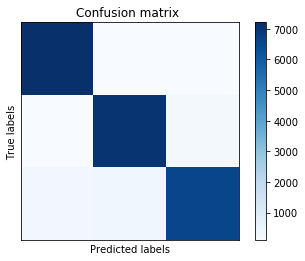

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()